In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore') 

In [2]:
# Importing the dataset

df = pd.read_csv(r"C:\Users\ASUS\Downloads\Automobile_data.csv")
pd.set_option('display.max_columns',50)
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            130        mpfi  3.47   2.68                9.0        111   
2            152        mpfi  2.68   3.47                9.0        154   
3            109        mpfi  3.19    3.4               10.0        102   
4            136        mpfi  3.19    3.4                8.0        115   
..           ...         ...   ...    ...                ...        ...   
200          141        mpfi  3.78   3.15                9.5        114   
201          141        mpfi  3.78   3.15                8.7        160   
202          173        mpfi  3.58   2.87                8.8        134   
203          145         idi  3.01    3.4               23.0        106   
204          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  13495  
1       5000        21           27  16500  
2       5000        19           26  16500  
3       5500        24           30  13950  
4       5500        18           22  17450  
..       ...       ...          ...    ...  
200     5400        23           28  16845  
201     5300        19           25  19045  
202     5500        18           23  21485  
203     4800        26           27  22470  
204     5400  

### Basic Analysis

In [3]:
# Analysing the first five columns
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19    3.4               10.0        102     5500        24           30   
4  3.19    3.4                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [4]:
# Analysing the last five columns
df.tail()

symboling normalized-losses   make fuel-type aspiration num-of-doors  \
200         -1                95  volvo       gas        std         four   
201         -1                95  volvo       gas      turbo         four   
202         -1                95  volvo       gas        std         four   
203         -1                95  volvo    diesel      turbo         four   
204         -1                95  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
200      sedan          rwd           front       109.1   188.8   68.9   
201      sedan          rwd           front       109.1   188.8   68.8   
202      sedan          rwd           front       109.1   188.8   68.9   
203      sedan          rwd           front       109.1   188.8   68.9   
204      sedan          rwd           front       109.1   188.8   68.9   

     height  curb-weight engine-type num-of-cylinders  engine-size  \
200    55.5         2952         ohc             four          141   
201    55.5         3049         ohc             four          141   
202    55.5         3012        ohcv              six          173   
203    55.5         3217         ohc              six          145   
204    55.5         3062         ohc             four          141   

    fuel-system  bore stroke  compression-ratio horsepower peak-rpm  city-mpg  \
200        mpfi  3.78   3.15                9.5        114     5400        23   
201        mpfi  3.78   3.15                8.7        160     5300        19   
202        mpfi  3.58   2.87                8.8        134     5500        18   
203         idi  3.01    3.4               23.0        106     4800        26   
204        mpfi  3.78   3.15                9.5        114     5400        19   

     highway-mpg  price  
200           28  16845  
201           25  19045  
202           23  21485  
203           27  22470  
204           25  22625

In [5]:
# Returing the meta-data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
# Getting statistical summary of the numerical columns
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

### Data Preprocessing
* Handling Null Values
* Handling Duplicates
* Checking for Data Types

In [7]:
# Replacing all '?' with null values

df = df.replace('?',np.NaN)

In [8]:
df

symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            130        mpfi  3.47   2.68                9.0        111   
2            152        mpfi  2.68   3.47                9.0        154   
3            109        mpfi  3.19    3.4               10.0        102   
4            136        mpfi  3.19    3.4                8.0        115   
..           ...         ...   ...    ...                ...        ...   
200          141        mpfi  3.78   3.15                9.5        114   
201          141        mpfi  3.78   3.15                8.7        160   
202          173        mpfi  3.58   2.87                8.8        134   
203          145         idi  3.01    3.4               23.0        106   
204          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  13495  
1       5000        21           27  16500  
2       5000        19           26  16500  
3       5500        24           30  13950  
4       5500        18           22  17450  
..       ...       ...          ...    ...  
200     5400        23           28  16845  
201     5300        19           25  19045  
202     5500        18           23  21485  
203     4800        26           27  22470  
204     5400  

In [9]:
# Checking for Null Values

df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
# Checking for Duplicates
df.duplicated().sum()

0

In [11]:
# Checking for Data Types

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
df

symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            130        mpfi  3.47   2.68                9.0        111   
2            152        mpfi  2.68   3.47                9.0        154   
3            109        mpfi  3.19    3.4               10.0        102   
4            136        mpfi  3.19    3.4                8.0        115   
..           ...         ...   ...    ...                ...        ...   
200          141        mpfi  3.78   3.15                9.5        114   
201          141        mpfi  3.78   3.15                8.7        160   
202          173        mpfi  3.58   2.87                8.8        134   
203          145         idi  3.01    3.4               23.0        106   
204          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  13495  
1       5000        21           27  16500  
2       5000        19           26  16500  
3       5500        24           30  13950  
4       5500        18           22  17450  
..       ...       ...          ...    ...  
200     5400        23           28  16845  
201     5300        19           25  19045  
202     5500        18           23  21485  
203     4800        26           27  22470  
204     5400  

In [13]:
# Converting into required datatypes

columns_float = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
df[columns_float] = df[columns_float].astype(float)


In [14]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [15]:
df

symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
0            130        mpfi  3.47    2.68                9.0       111.0   
1            130        mpfi  3.47    2.68                9.0       111.0   
2            152        mpfi  2.68    3.47                9.0       154.0   
3            109        mpfi  3.19    3.40               10.0       102.0   
4            136        mpfi  3.19    3.40                8.0       115.0   
..           ...         ...   ...     ...                ...         ...   
200          141        mpfi  3.78    3.15                9.5       114.0   
201          141        mpfi  3.78    3.15                8.7       160.0   
202          173        mpfi  3.58    2.87                8.8       134.0   
203          145         idi  3.01    3.40               23.0       106.0   
204          141        mpfi  3.78    3.15                9.5       114.0   

     peak-rpm  city-mpg  highway-mpg    price  
0      5000.0        21           27  13495.0  
1      5000.0        21           27  16500.0  
2      5000.0        19           26  16500.0  
3      5500.0        24           30  13950.0  
4      5500.0        18           22  17450.0  
..        ...       ...          ...      ...  
200    5400.0        23           28  16845.0  
201    5300.0        19           25  19045.0  
202    5500.0        18           23  214

In [16]:
# Handling the Null Values

columns_with_null=[]

for i in df:
    if df[i].isnull().sum()>0:
        columns_with_null.append(i)
columns_with_null

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [17]:
# Peforming the mean imputation

mean_colms = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']

for i in mean_colms:
    df[i]=df[i].fillna(round(df[i].mean(),2))

In [18]:
# Peforming the mean imputation

df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [19]:
# simply drop whole row with NaN in "price" column   
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True) 
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

In [20]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
colms = ['normalized-losses','horsepower','peak-rpm']

df[colms] = df[colms].astype(int)

In [22]:
df

symboling  normalized-losses         make fuel-type aspiration  \
0            3                122  alfa-romero       gas        std   
1            3                122  alfa-romero       gas        std   
2            1                122  alfa-romero       gas        std   
3            2                164         audi       gas        std   
4            2                164         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1                 95        volvo       gas        std   
201         -1                 95        volvo       gas      turbo   
202         -1                 95        volvo       gas        std   
203         -1                 95        volvo    diesel      turbo   
204         -1                 95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
0            130        mpfi  3.47    2.68                9.0         111   
1            130        mpfi  3.47    2.68                9.0         111   
2            152        mpfi  2.68    3.47                9.0         154   
3            109        mpfi  3.19    3.40               10.0         102   
4            136        mpfi  3.19    3.40                8.0         115   
..           ...         ...   ...     ...                ...         ...   
200          141        mpfi  3.78    3.15                9.5         114   
201          141        mpfi  3.78    3.15                8.7         160   
202          173        mpfi  3.58    2.87                8.8         134   
203          145         idi  3.01    3.40               23.0         106   
204          141        mpfi  3.78    3.15                9.5         114   

     peak-rpm  city-mpg  highway-mpg    price  
0        5000        21           27  13495.0  
1        5000        21           27  16500.0  
2        5000        19           26  16500.0  
3        5500        24           30  13950.0  
4        5500        18           22  17450.0  
..        ...       ...          ...      ...  
200      5400        23           28  16845.0  
201      5300        19           25  19045.0  
202      5500        18           23  214

### Exploratory Data Analysis(EDA)
* Univariate Analysis
* Bivariate Analysis
* Multivarite Analysis

### Unvariate Analysis

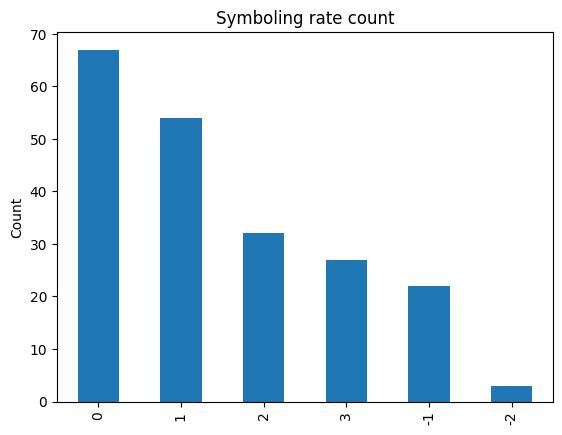

In [23]:
df['symboling'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Symboling rate count')
plt.show()

* 0 Category is having the majority symboling rate

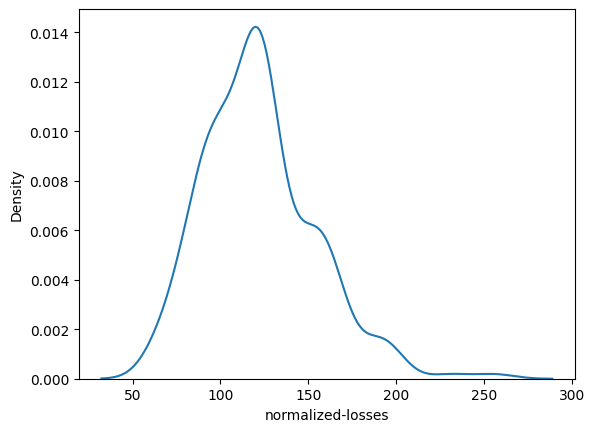

In [24]:
sns.kdeplot(df['normalized-losses'])
plt.show()

In [25]:
df['normalized-losses'].describe()

count    205.000000
mean     122.000000
std       31.681008
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: normalized-losses, dtype: float64

* min value of normalised losses is 65
* max value is 256
* mode,mean is 122

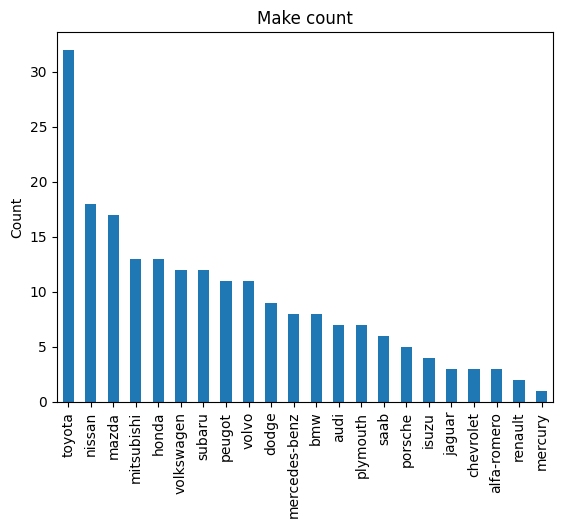

In [26]:
df['make'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Make count')
plt.show()

* toyota has the max sales
* mercury was sold the least

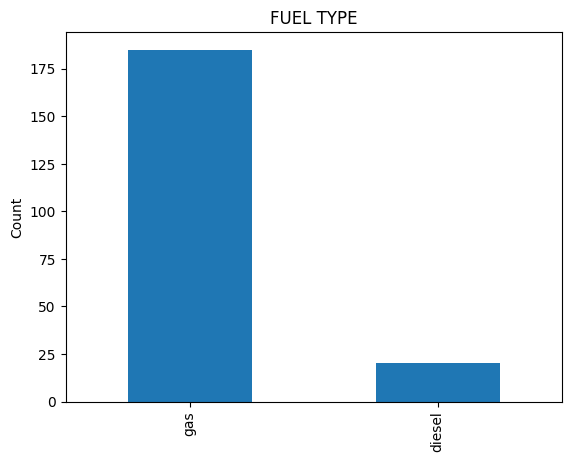

In [27]:
df['fuel-type'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('FUEL TYPE')
plt.show()

* almost all the vehicle uses gas as fuel

In [28]:
df['fuel-type'].describe()

count     205
unique      2
top       gas
freq      185
Name: fuel-type, dtype: object

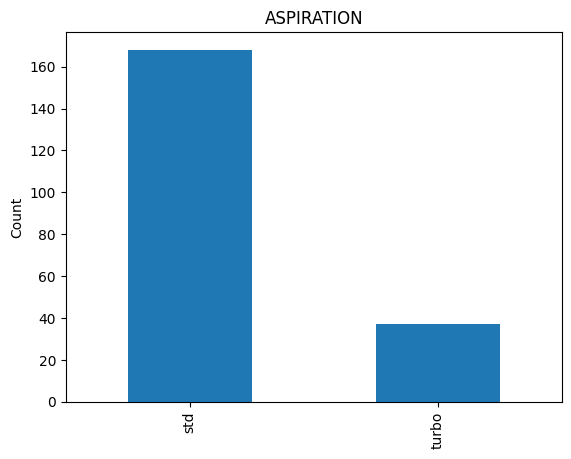

In [29]:
df['aspiration'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('ASPIRATION')
plt.show()

* almost all the cars have naturally aspirated engines

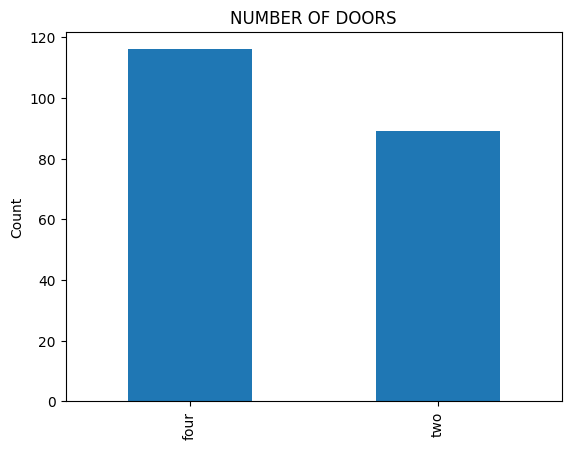

In [30]:
df['num-of-doors'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('NUMBER OF DOORS')
plt.show()

In [31]:
df['num-of-doors'].describe()

count      205
unique       2
top       four
freq       116
Name: num-of-doors, dtype: object

* there are cars with two doors and four doors
* 116 cars have four doors 

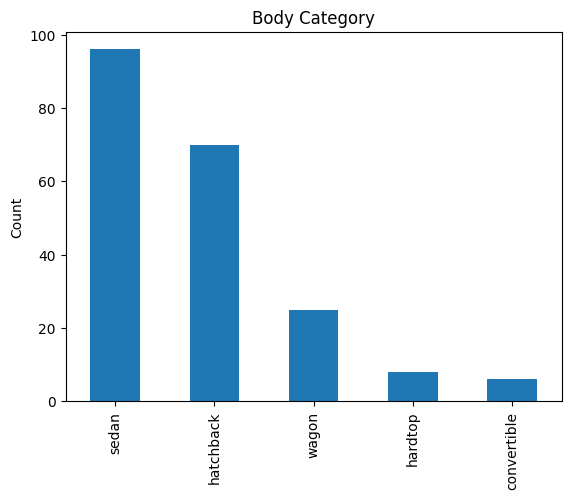

count       205
unique        5
top       sedan
freq         96
Name: body-style, dtype: object

In [32]:
df['body-style'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Body Category')
plt.show()
df['body-style'].describe()

* majority of the cars are sedan (96 in number)
* convertible are least in number
* Categories of body are SEDAN,HATCHBACK,WAGON,HARDTOP,CONVERTIBLE

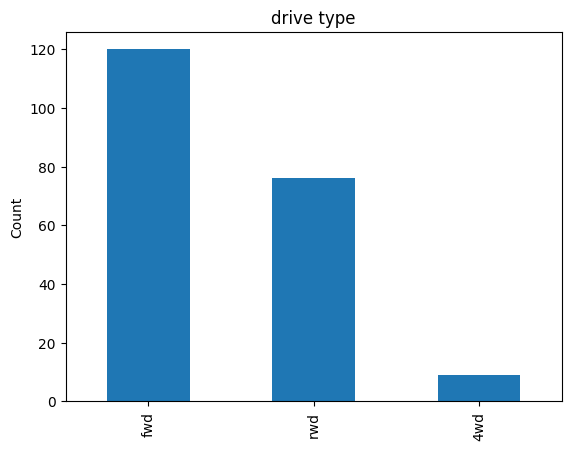

count     205
unique      3
top       fwd
freq      120
Name: drive-wheels, dtype: object

In [33]:
df['drive-wheels'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('drive type')
plt.show()
df['drive-wheels'].describe()

* there are 3 drive types fwd,rwd,4wd
* most of the cars are fwd (120 in number)
* 4wd cars are least in number

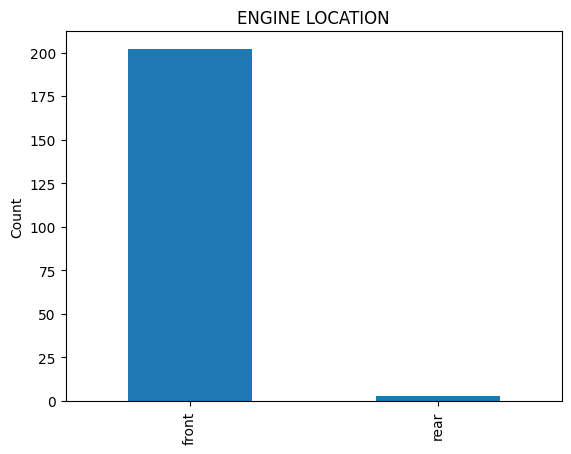

count       205
unique        2
top       front
freq        202
Name: engine-location, dtype: object

In [34]:
df['engine-location'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('ENGINE LOCATION')
plt.show()
df['engine-location'].describe()

* engines are located in either front or rear of a car
* 202 cars have engine located at the front
  

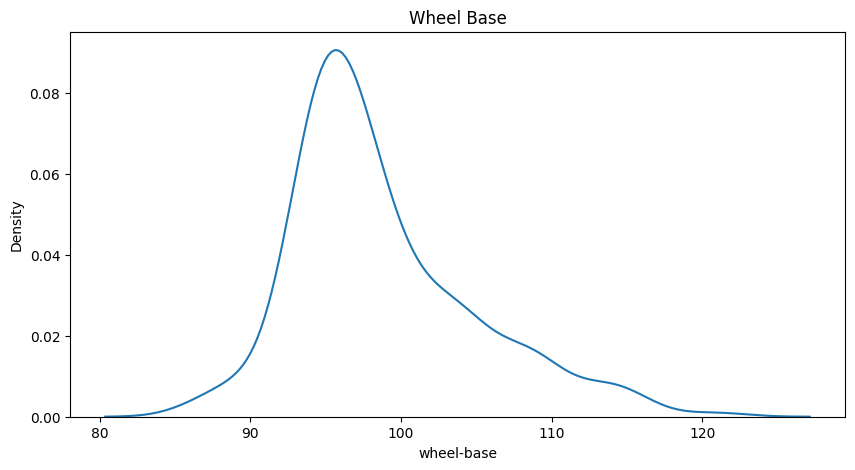

94.5

In [35]:
plt.figure(figsize=(10,5))
# df['wheel-base'].value_counts().plot(kind='bar')
# plt.ylabel('Count')
plt.title('Wheel Base')
sns.kdeplot(df['wheel-base'])
plt.show()
df['wheel-base'].describe()
df['wheel-base'].mode()[0]

* Max wheel base is 120.9
* min wheel base is 86.6
* mean wheel base is 98.756585
* Mode is 94.5

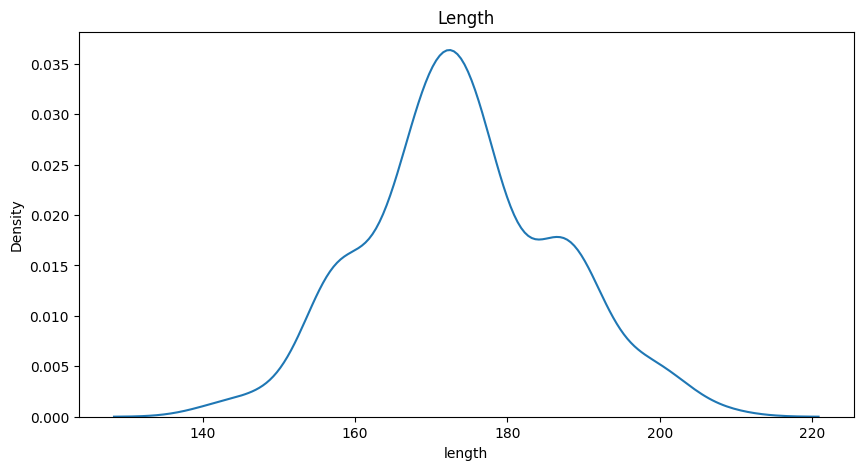

157.3

In [36]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['length'])
plt.title('Length')

plt.show()
df['length'].describe()
df['length'].mode()[0]

* Mean length of car is 174.049268
* lowest length is  141.100000
* max length is  208.100000
* Mode is 157.3

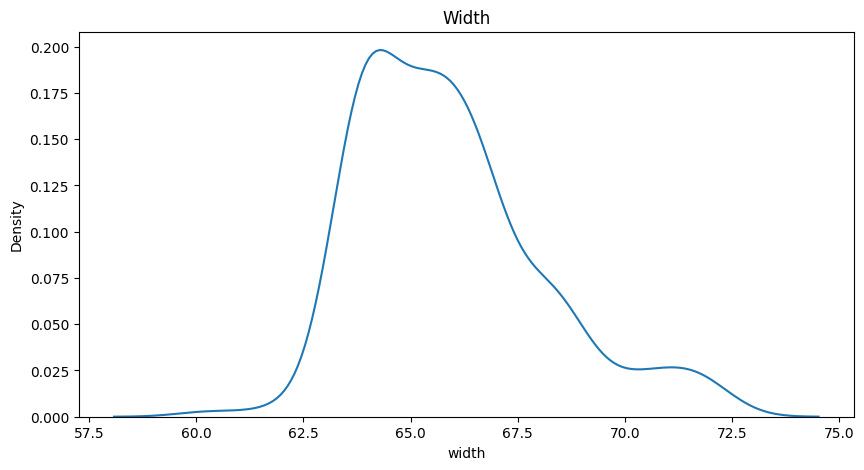

63.8

In [37]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['width'])
plt.title('Width')

plt.show()
df['width'].describe()
df['width'].mode()[0]

* Mean width of a car is 65.907805
* lowest width is 60.300000
* max width is 72.300000
* Mode is 63.8

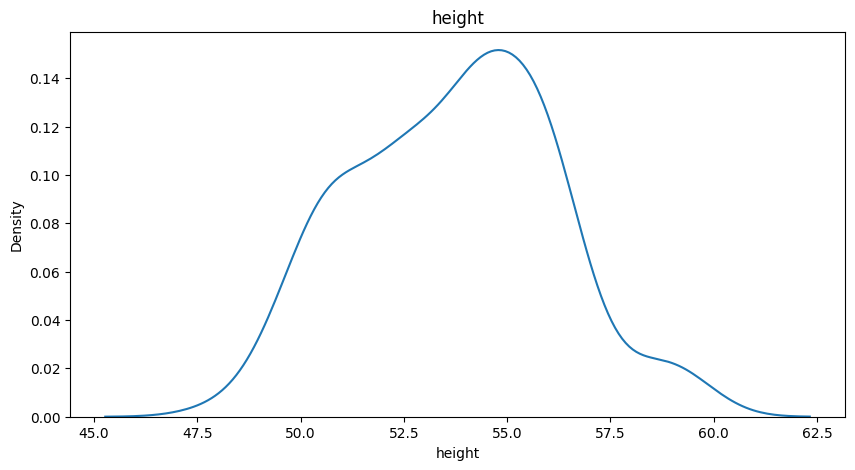

50.8

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['height'])
plt.title('height')
plt.show()
df['height'].describe()
df['height'].mode()[0]

* Mean height of car is 53.724878
* min height is 47.800000
* max height is 59.800000
* Mode is 50.8

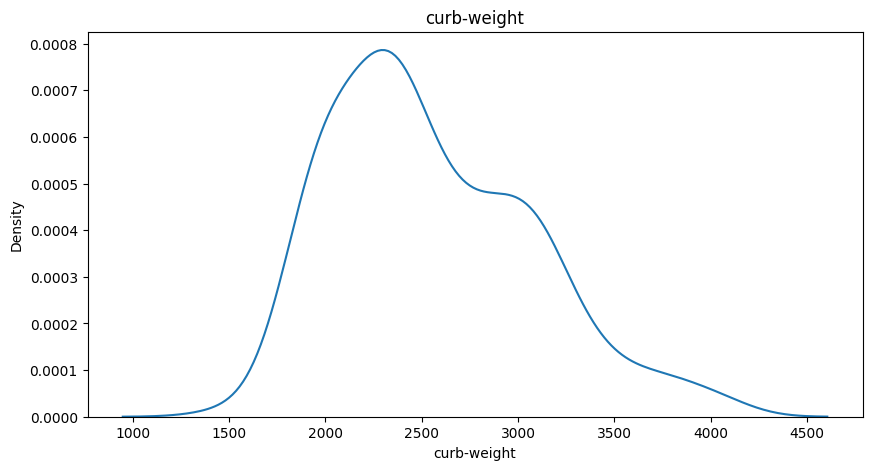

2385

In [39]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['curb-weight'])
plt.title('curb-weight')
plt.show()
# df['curb-weight'].describe()
df['curb-weight'].mode()[0]

* Mean curb weight of car is 2555.565854
* min curb weight is 1488.000000
* max curb weight is  4066.000000
* Mode is 2385

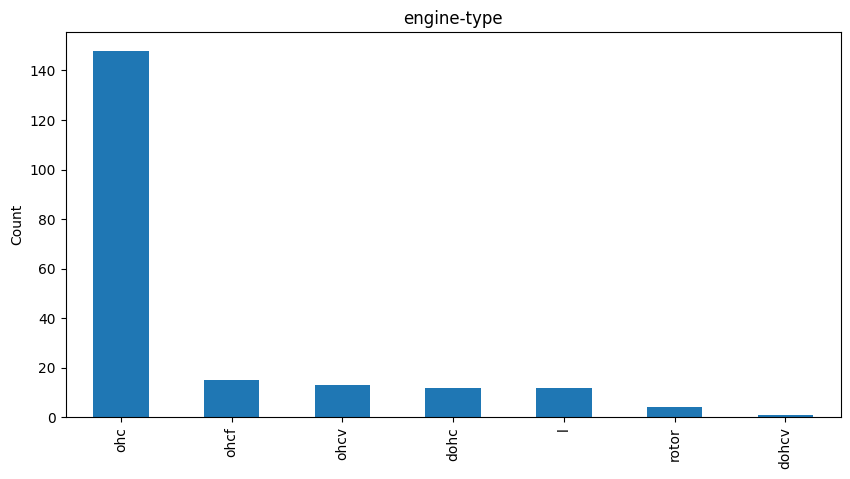

count     205
unique      7
top       ohc
freq      148
Name: engine-type, dtype: object

In [40]:
plt.figure(figsize=(10,5))
df['engine-type'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('engine-type')
plt.show()
df['engine-type'].describe()


* Engine types are ohc,ohcf,ohcv,dohc,l,rotor,dohcv
* there are 148 cars with ohc engine 

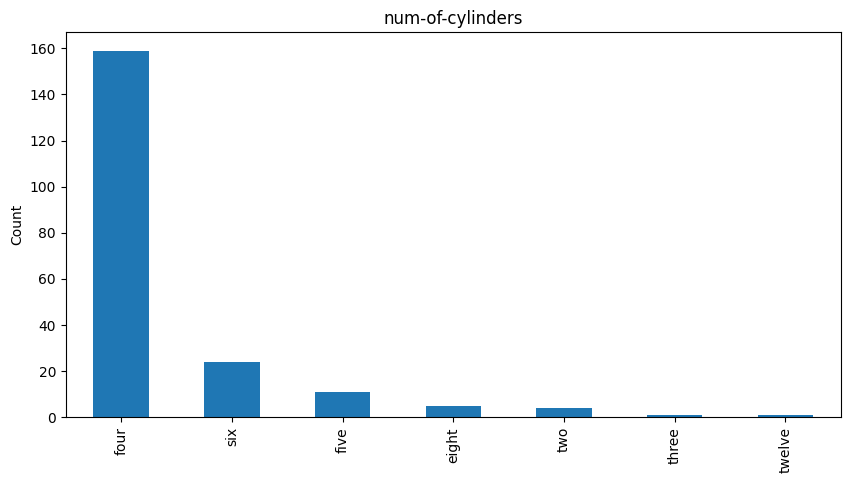

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [41]:
plt.figure(figsize=(10,5))
df['num-of-cylinders'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('num-of-cylinders')
plt.show()
df['num-of-cylinders'].describe()

* there are cars with four,six,five,eight,two,three,twelve no of cylinders
* four cylinder cars are the maximum in number(159 cars)

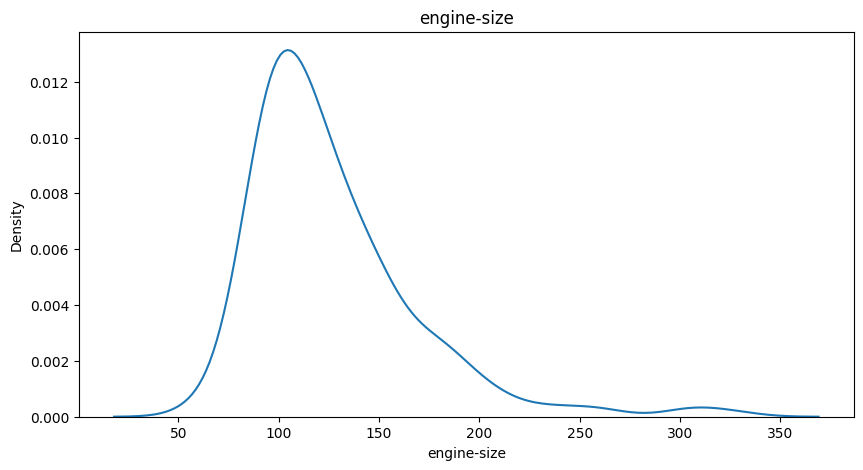

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [42]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['engine-size'])
plt.title('engine-size')
plt.show()
df['engine-size'].describe()
# df['engine-size'].mode()[0]

* Mean size of engine is 126.907317
* lowest engine size is 61.0000
* max engine size is 326.00000
* Mode is 92

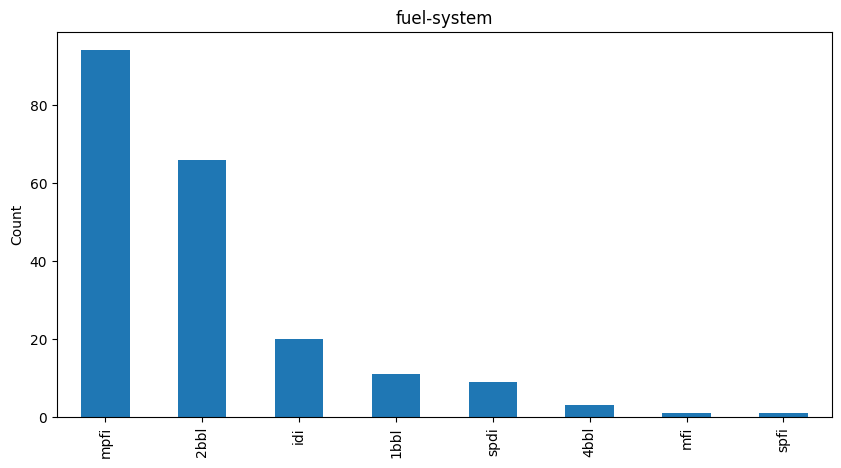

count      205
unique       8
top       mpfi
freq        94
Name: fuel-system, dtype: object

In [43]:
plt.figure(figsize=(10,5))
df['fuel-system'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('fuel-system')
plt.show()
df['fuel-system'].describe()

* fuel_systems = ['mpfi', '2bbl', 'idi', '1bbl', 'spdi', '4bbl', 'mfi', 'spfi']

* max cars have mpfi fuel system (94)
* next most common fuel system is '2bbl'

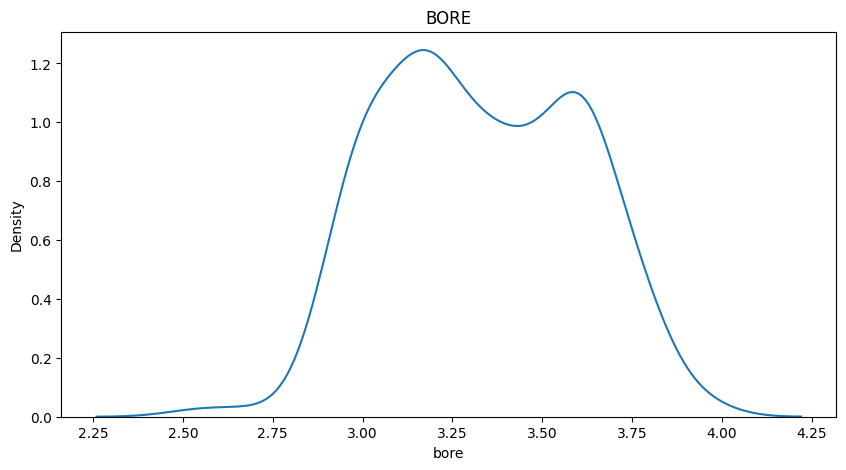

3.62

In [44]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['bore'])
plt.title('BORE')
plt.show()
# df['bore'].describe()
df['bore'].mode()[0]

* mean diameter of the bore is  3.329756
* lowest diameter is  2.540000
* max diameter is 3.940000
* mode = 3.62

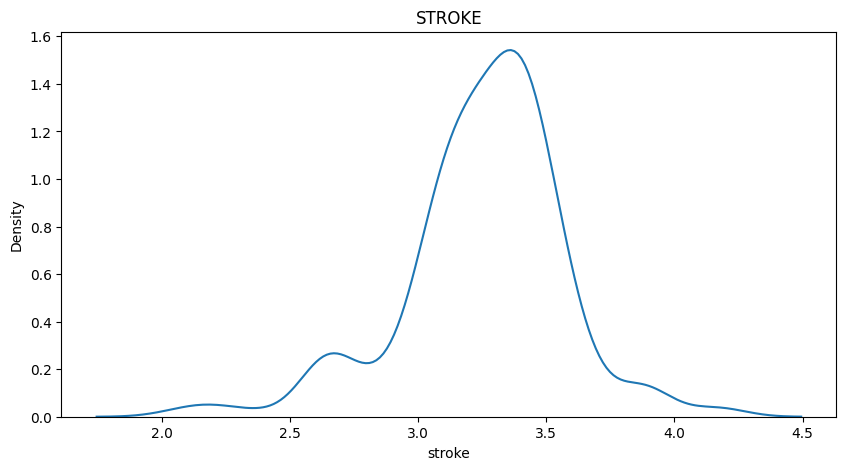

3.4

In [45]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['stroke'])
plt.title('STROKE')
plt.show()
# df['stroke'].describe()
df['stroke'].mode()[0]

* mean stroke length is 3.255512
* min length is 2.070000
* max length is 4.170000
* mode = 3.4

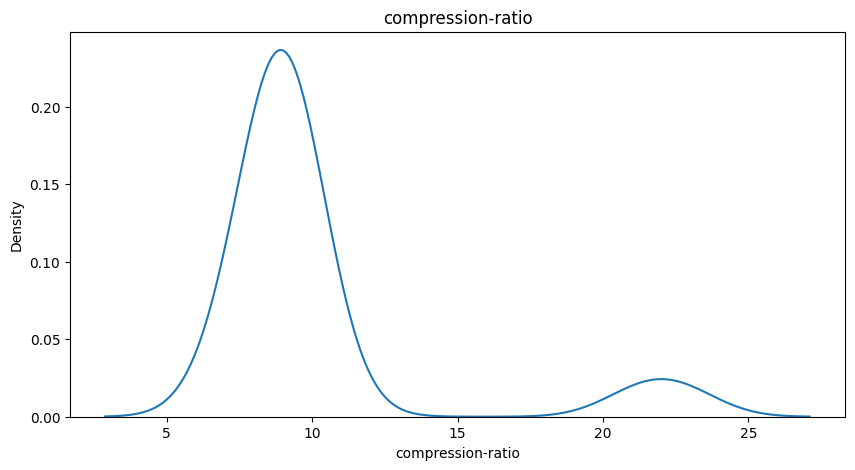

9.0

In [46]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['compression-ratio'])
plt.title('compression-ratio')
plt.show()
# df['compression-ratio'].describe()
df['compression-ratio'].mode()[0]

* mean compression-ratio of cars is 10.142537
* min is 7.000000
* max is 23.000000
* mode is 9.0

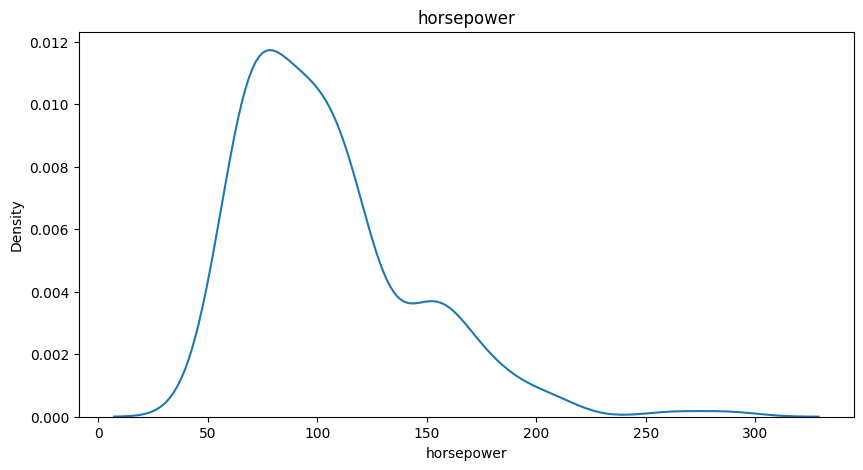

68

In [47]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['horsepower'])
plt.title('horsepower')
plt.show()
# df['horsepower'].describe()
df['horsepower'].mode()[0]

* mean horsepower of cars is 104.253659
* min is 48.00000
* max is 288.00000
* mode = 68

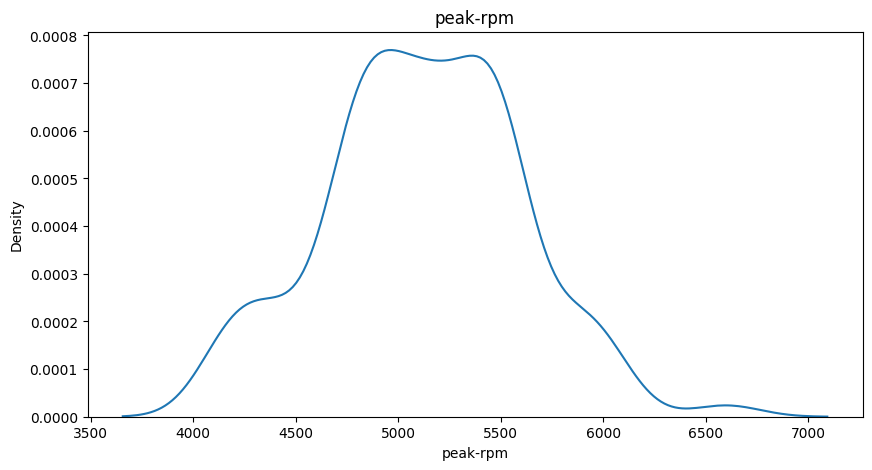

5500

In [48]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['peak-rpm'])
plt.title('peak-rpm')
plt.show()
# df['peak-rpm'].describe()
df['peak-rpm'].mode()[0]

* mean peak rpm of cars is 5125.365854
* min is 4150.0000
* max is 6600.00000
* mode = 5500

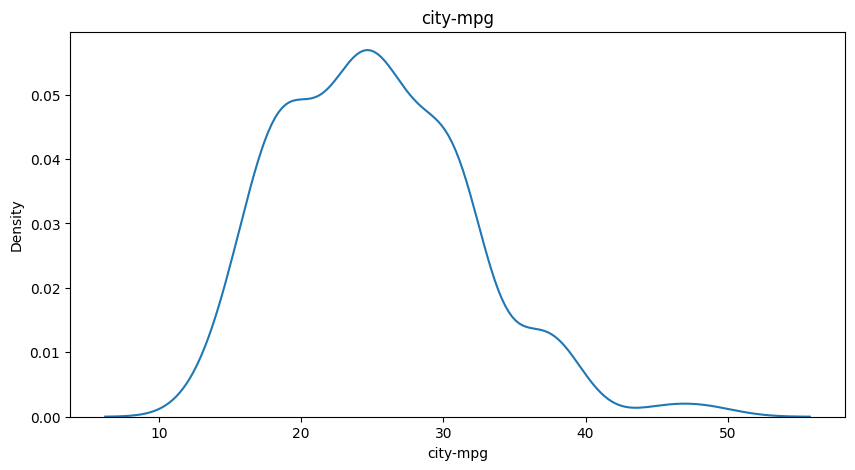

31

In [49]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['city-mpg'])
plt.title('city-mpg')
plt.show()
# df['city-mpg'].describe()
df['city-mpg'].mode()[0]

* mean city-mpg is 25.219512
* min is 13.00000
* max is 49.00000
* mode = 31

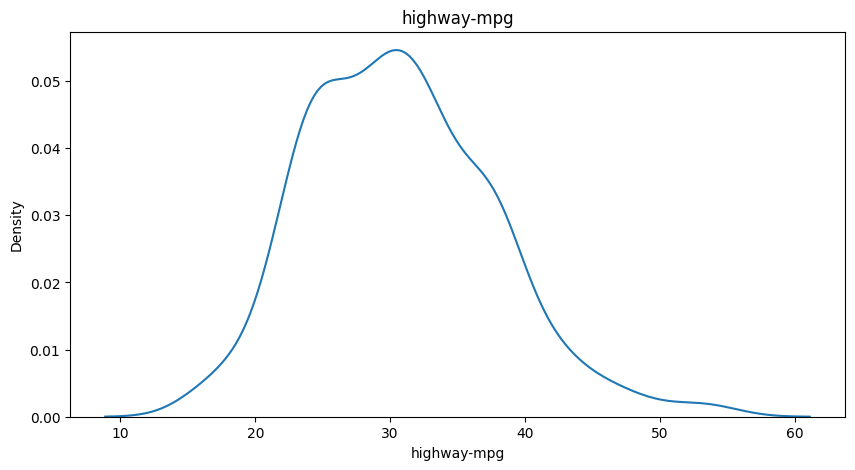

25

In [50]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['highway-mpg'])
plt.title('highway-mpg')
plt.show()
# df['highway-mpg'].describe()
df['highway-mpg'].mode()[0]

* mean highway-mpg is 30.751220
* min is 16.00000
* max is 54.00000
* mode = 25

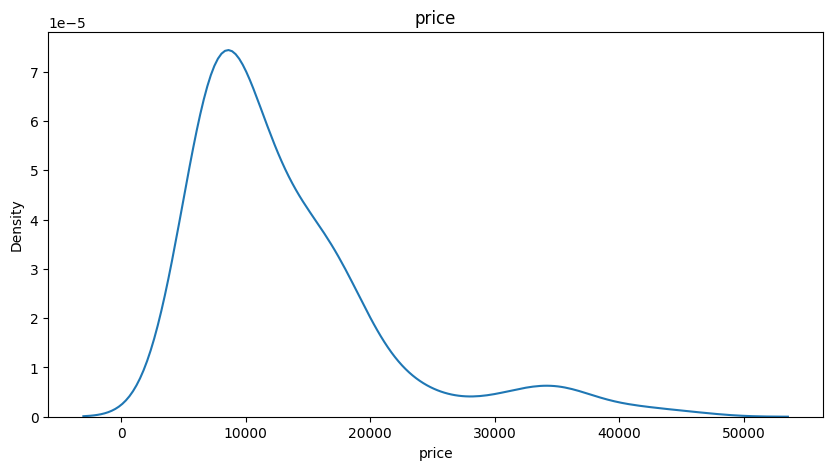

13207.13

In [51]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'])
plt.title('price')
plt.show()
# df['price'].describe()
df['price'].mode()[0]

* mean price of cars is 13207.129366
* min price is 5118.00000
* max price is 45400.00000
* mode = 13207.13

### Bivariate Analysis

In [52]:
df
pd.set_option('display.max_rows',206)
df

symboling  normalized-losses           make fuel-type aspiration  \
0            3                122    alfa-romero       gas        std   
1            3                122    alfa-romero       gas        std   
2            1                122    alfa-romero       gas        std   
3            2                164           audi       gas        std   
4            2                164           audi       gas        std   
5            2                122           audi       gas        std   
6            1                158           audi       gas        std   
7            1                122           audi       gas        std   
8            1                158           audi       gas      turbo   
9            0                122           audi       gas      turbo   
10           2                192            bmw       gas        std   
11           0                192            bmw       gas        std   
12           0                188            bmw       gas        std   
13           0                188            bmw       gas        std   
14           1                122            bmw       gas        std   
15           0                122            bmw       gas        std   
16           0                122            bmw       gas        std   
17           0                122            bmw       gas        std   
18           2                121      chevrolet       gas        std   
19           1                 98      chevrolet       gas        std   
20           0                 81      chevrolet       gas        std   
21           1                118          dodge       gas        std   
22           1                118          dodge       gas        std   
23           1                118          dodge       gas      turbo   
24           1                148          dodge       gas        std   
25           1                148          dodge       gas        std   
26           1                148          dodge       gas        std   
27           1                148          dodge       gas      turbo   
28          -1                110          dodge       gas        std   
29           3                145          dodge       gas      turbo   
30           2                137          honda       gas        std   
31           2                137          honda       gas        std   
32           1                101          honda       gas        std   
33           1                101          honda       gas        std   
34           1                101          honda       gas        std   
35           0                110          honda       gas        std   
36           0                 78          honda       gas        std   
37           0                106          honda       gas        std   
38           0                106          honda       gas        std   
39           0                 85          honda       gas        std   
40           0                 85          honda       gas        std   
41           0                 85          honda       gas        std   
42           1                107          honda       gas        std   
43           0                122          isuzu       gas        std   
44           1                122          isuzu       gas        std   
45           0                122          isuzu       gas        std   
46           2                122          isuzu       gas        std   
47           0                145         jaguar       gas        std   
48           0                122         jaguar       gas        std   
49           0                122         jaguar       gas        std   
50           1                104          mazda       gas        std   
51           1                104          mazda       gas        std   
52           1                104          mazda       gas        std   
53           1                113          mazda       gas     

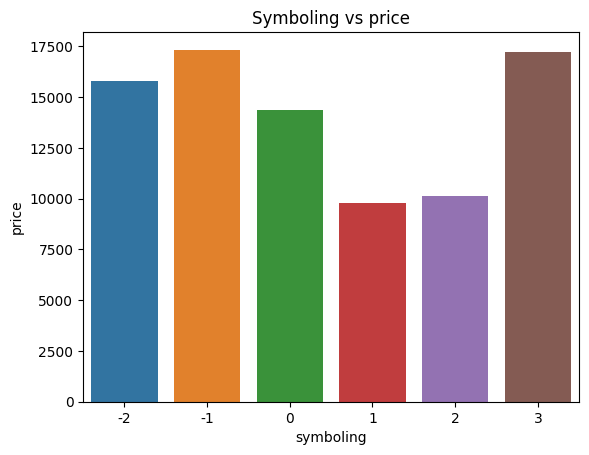

In [53]:
sns.barplot(data=df,x='symboling',y='price',errorbar=None)
plt.title('Symboling vs price')
plt.show()

* safer cars are more expensive
* riskier cars are affordable
* Cars with symboling -1 and symboling -2 have similar prices.
* Cars with symboling 1 have the lowest average price.

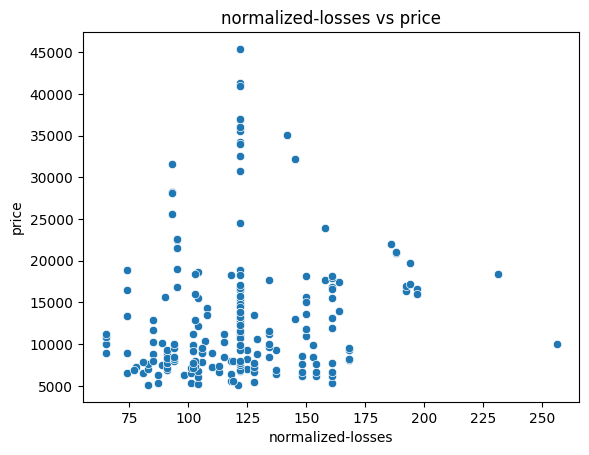

In [54]:
sns.scatterplot(data=df,x='normalized-losses',y='price')
plt.title('normalized-losses vs price')
plt.show()

* the correlation is not linear
* cars with normalised loss closer to 125 are more expensive than others.

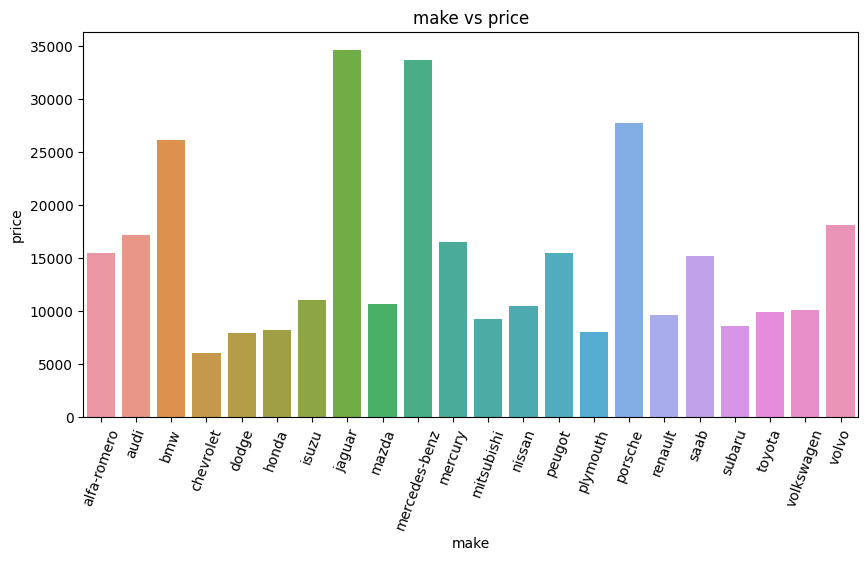

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='make',y='price',errorbar=None,)
plt.title('make vs price')
plt.xticks(rotation=70)
plt.show()

* mercedes-benz and jaguar are the most expensive car brands
* chevrolet,dodge ,honda and plymouth are the least expensive

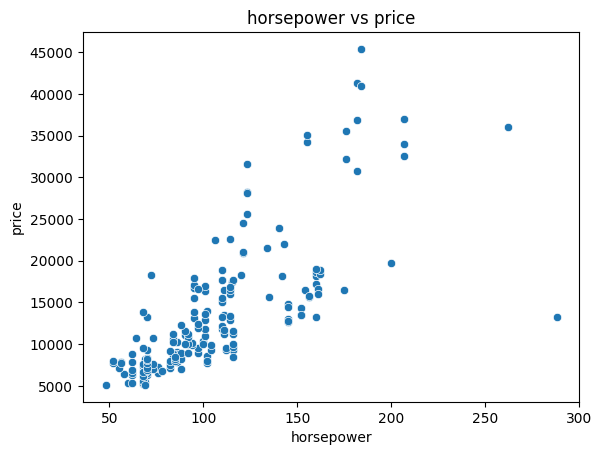

In [56]:
sns.scatterplot(data=df,x='horsepower',y='price')
plt.title('horsepower vs price')
plt.show()

* There is a positive correlation between horsepower and price.
* Cars with higher horsepower tend to be more expensive.(with few exceptions)

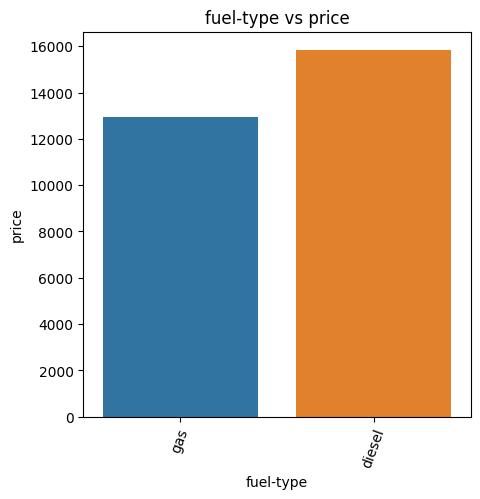

In [57]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='fuel-type',y='price',errorbar=None,)
plt.title('fuel-type vs price')
plt.xticks(rotation=70)
plt.show()

* price for diesel cars are more.

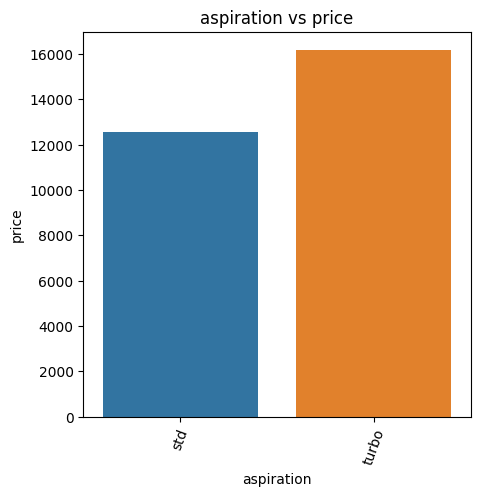

In [58]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='aspiration',y='price',errorbar=None,)
plt.title('aspiration vs price')
plt.xticks(rotation=70)
plt.show()

* cars with turbo are costlier than cars with std.

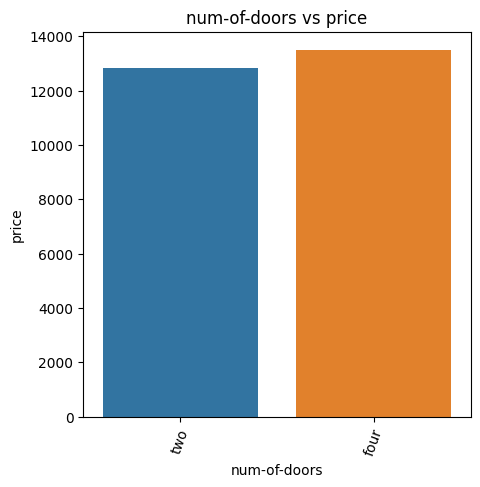

In [59]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='num-of-doors',y='price',errorbar=None,)
plt.title('num-of-doors vs price')
plt.xticks(rotation=70)
plt.show()

* there is not much difference between the prices when it comes to number of doors
  

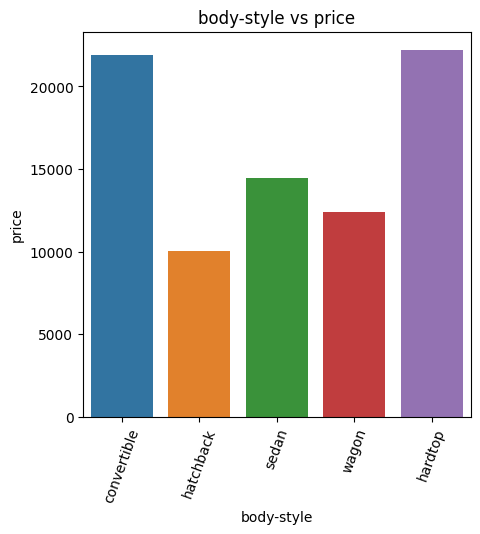

In [60]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='body-style',y='price',errorbar=None,)
plt.title('body-style vs price')
plt.xticks(rotation=70)
plt.show()

* covertible and hardtop have higher prices when compared to hatchback,sedan and wagon
* hatchback have lower prices

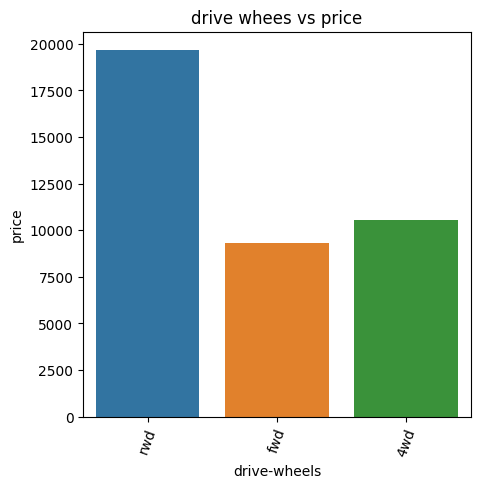

In [61]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='drive-wheels',y='price',errorbar=None,)
plt.title('drive whees vs price')
plt.xticks(rotation=70)
plt.show()

* rear wheel drive have higher prices
* forward and 4 wheel drive have lower prices

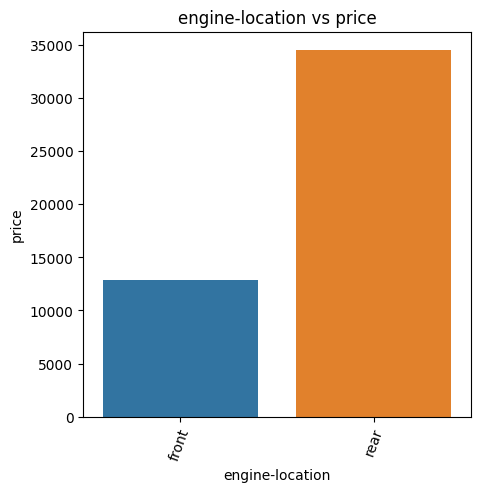

In [62]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='engine-location',y='price',errorbar=None,)
plt.title('engine-location vs price')
plt.xticks(rotation=70)
plt.show()

* prices for cars having engine at the rear are significantly higher than for cars having engine located at the front

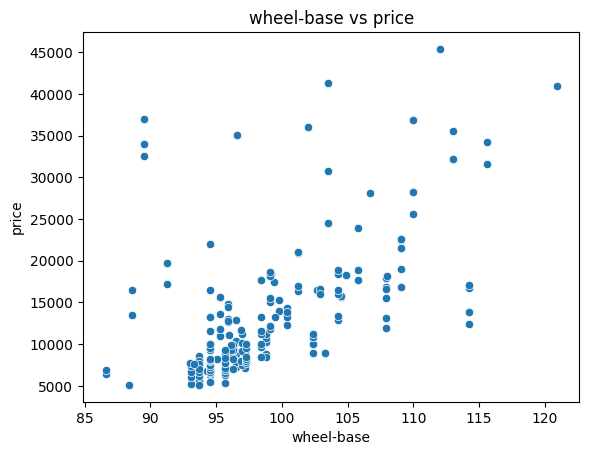

In [63]:
sns.scatterplot(data=df,x='wheel-base',y='price')
plt.title('wheel-base vs price')
plt.show()

In [64]:
df['wheel-base'].corr(df['price'])

0.5831681494352277

* most of the cars have wheel base between 90 and 105.(prices fall between 5000 and 10000)
* there is  moderate positive correlation 

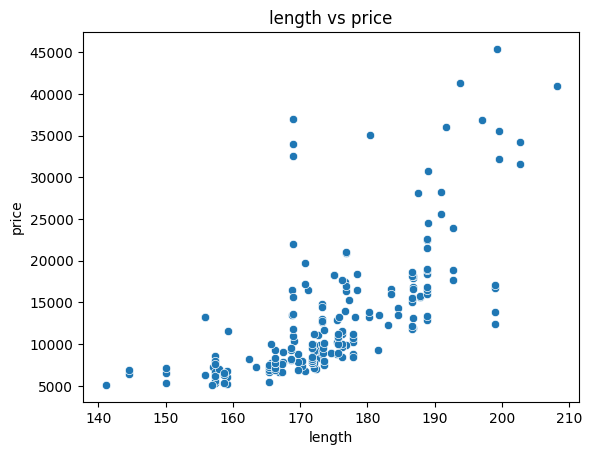

In [65]:
sns.scatterplot(data=df,x='length',y='price')
plt.title('length vs price')
plt.show()

* most of the cars have length between 160 and 190 (price ranges between 5000 and 20000)
* shows moderate positive correlation

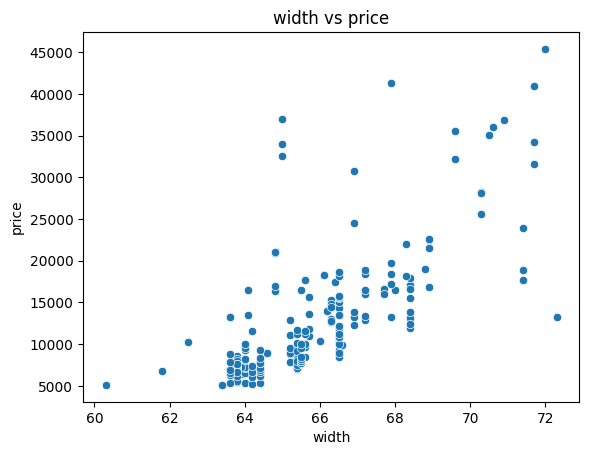

In [66]:
sns.scatterplot(data=df,x='width',y='price')
plt.title('width vs price')
plt.show()

* shows a moderately positive correlation
* most of the cars have width between 63 and 69 (price ranges from 5000 to 18000)

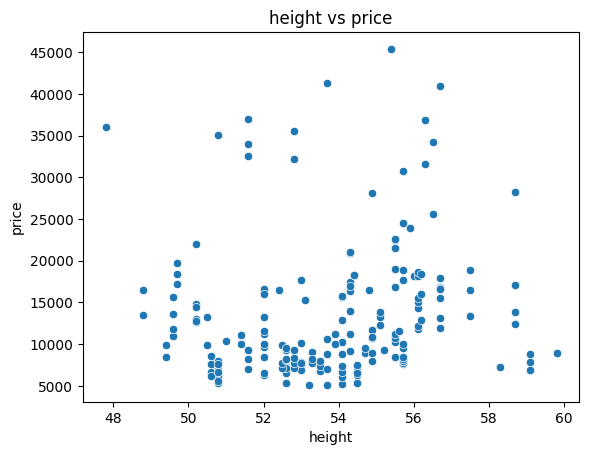

In [67]:
sns.scatterplot(data=df,x='height',y='price')
plt.title('height vs price')
plt.show()

* shows no correlation
* most of the cars have height between 51 and 56.

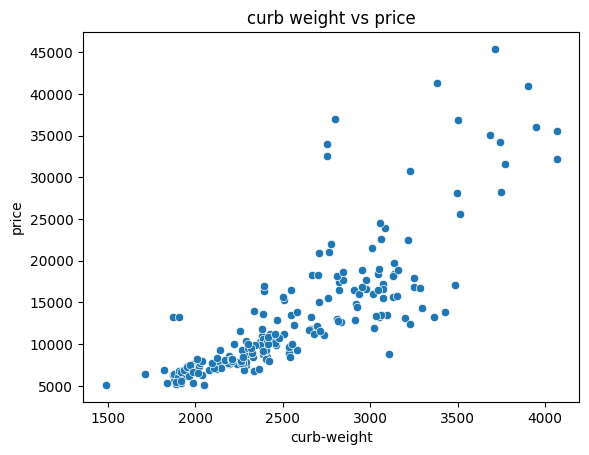

In [68]:
sns.scatterplot(data=df,x='curb-weight',y='price')
plt.title('curb weight vs price')
plt.show()

* shows positive linear correlation
* most of the cars have curb weight between 1800 and 3200(price ranges from 5000 to 15000)

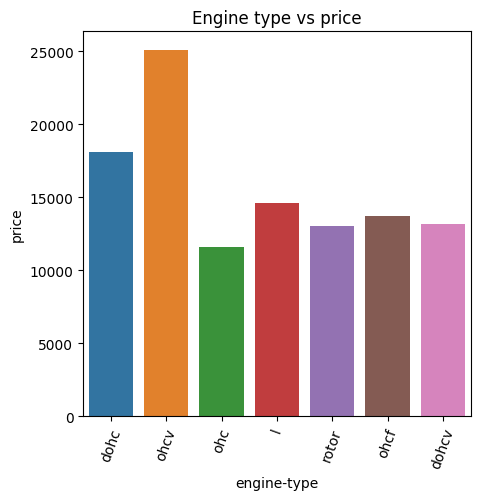

In [69]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='engine-type',y='price',errorbar=None,)
plt.title('Engine type vs price')
plt.xticks(rotation=70)
plt.show()

* ohcv engine type has max mean price while ohc has lowest.
* dohc has the 2nd highest mean price
* rest of the engine types have similar mean prices

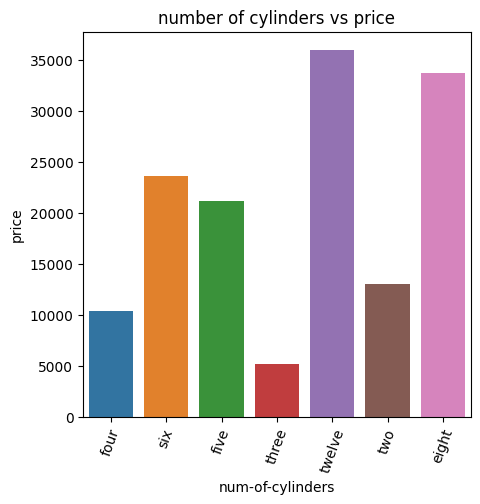

In [70]:
plt.figure(figsize=(5,5))
sns.barplot(data=df,x='num-of-cylinders',y='price',errorbar=None,)
plt.title('number of cylinders vs price')
plt.xticks(rotation=70)
plt.show()

* when num of cylinders increases price also increases
* cars with 12 cylinders have highest price while cars with 2,4,3 have lowest prices.

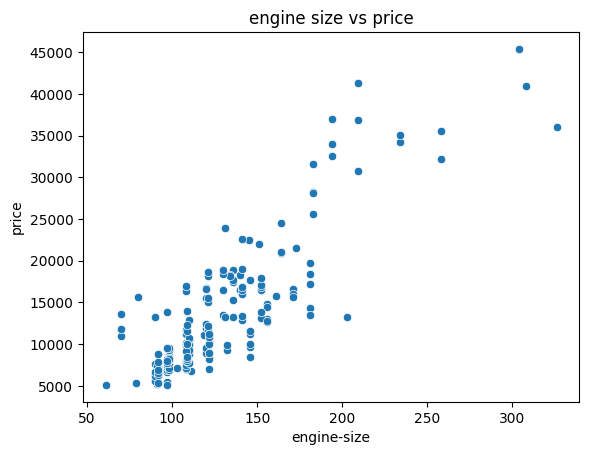

In [71]:
sns.scatterplot(data=df,x='engine-size',y='price')
plt.title('engine size vs price')
plt.show()

* shows positive linear correlation
* most of the cars have engine size between 80 and 180 ( price ranges from 5000 to 18000)

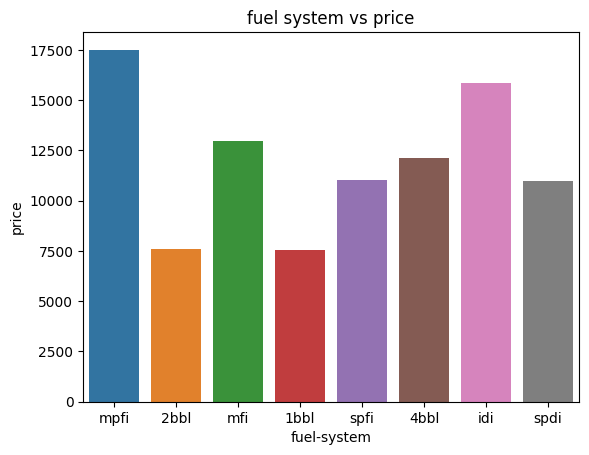

In [72]:
sns.barplot(data=df,x='fuel-system',y='price',errorbar=None)
plt.title('fuel system vs price')
plt.show()

* cars with mpfi system has highest mean price while 2bbl and 1bbl has lowest mean price.

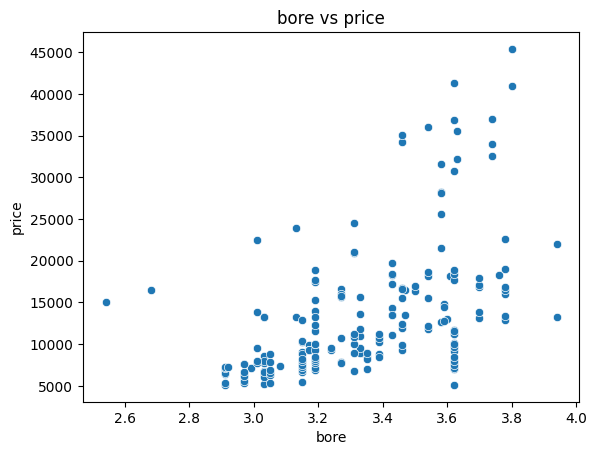

In [73]:
sns.scatterplot(data=df,x='bore',y='price')
plt.title('bore vs price')
plt.show()

In [74]:
df['bore'].corr(df['price'])

0.5322995866687721

* shows moderate positive correlation
* most of the cars have bore diameter  from 2.9 to 3.7

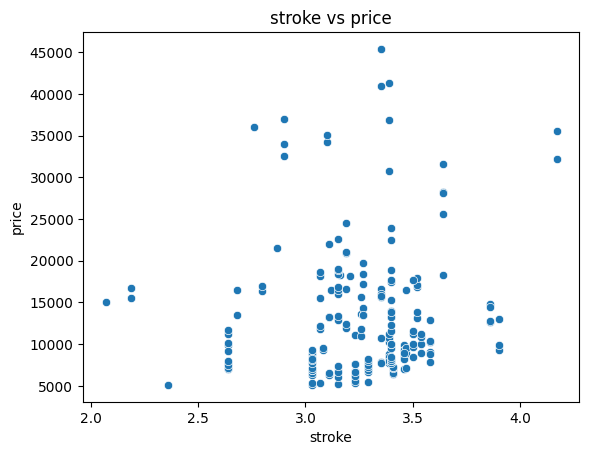

In [75]:
sns.scatterplot(data=df,x='stroke',y='price')
plt.title('stroke vs price')
plt.show()

In [76]:
df['stroke'].corr(df['price'])

0.08208832117930033

* does not show any correlation
* most of the cars have stroke length between 3.0 and 3.7

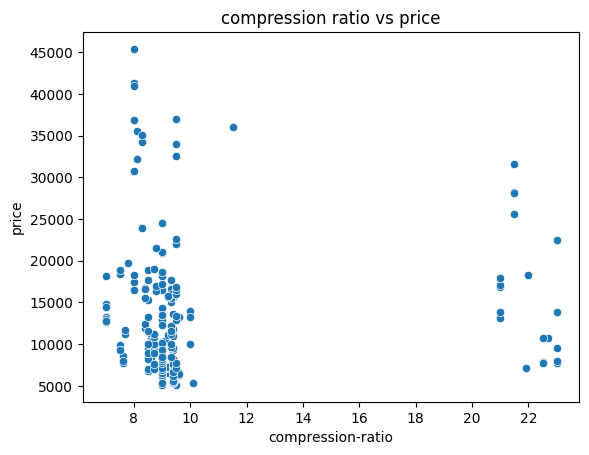

In [77]:
sns.scatterplot(data=df,x='compression-ratio',y='price')
plt.title('compression ratio vs price')
plt.show()

In [78]:
df['compression-ratio'].corr(df['price'])

0.07099036233572067

* does not show correlation
* most of the cars have compression ratio between 5 and 10

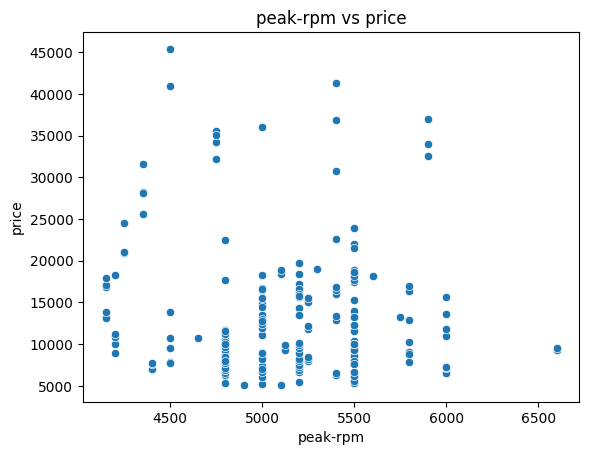

In [79]:
sns.scatterplot(data=df,x='peak-rpm',y='price')
plt.title('peak-rpm vs price')
plt.show()

In [80]:
df['peak-rpm'].corr(df['price'])

-0.10085057835108867

* no correlation
* most of the cars have peak rpm between 4800 to 5600

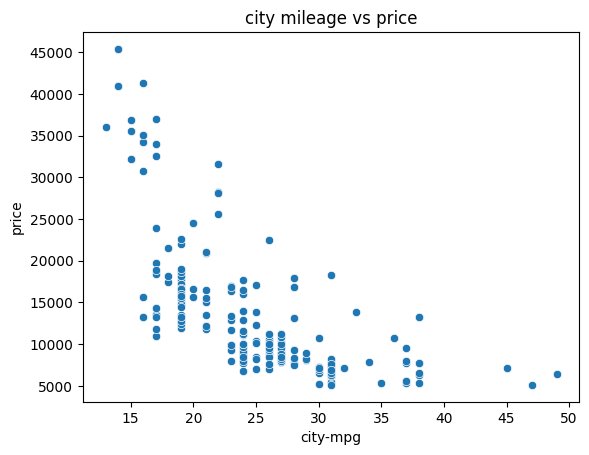

In [81]:
sns.scatterplot(data=df,x='city-mpg',y='price')
plt.title('city mileage vs price')
plt.show()

In [82]:
df['city-mpg'].corr(df['price'])

-0.6674492646597923

* shows negative correlation
  

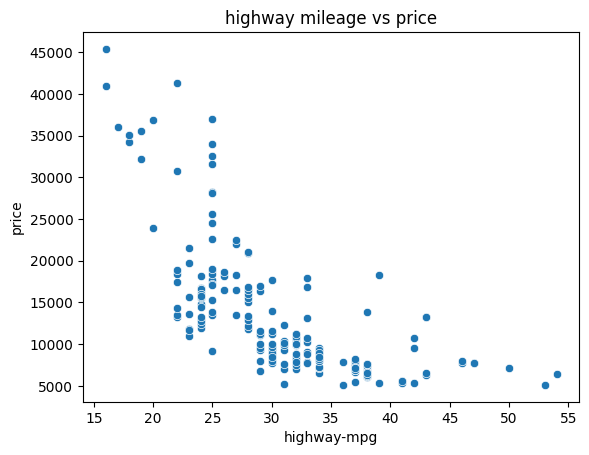

In [83]:
sns.scatterplot(data=df,x='highway-mpg',y='price')
plt.title('highway mileage vs price')
plt.show()

* shows negative correlation

### Multivariate Analysis

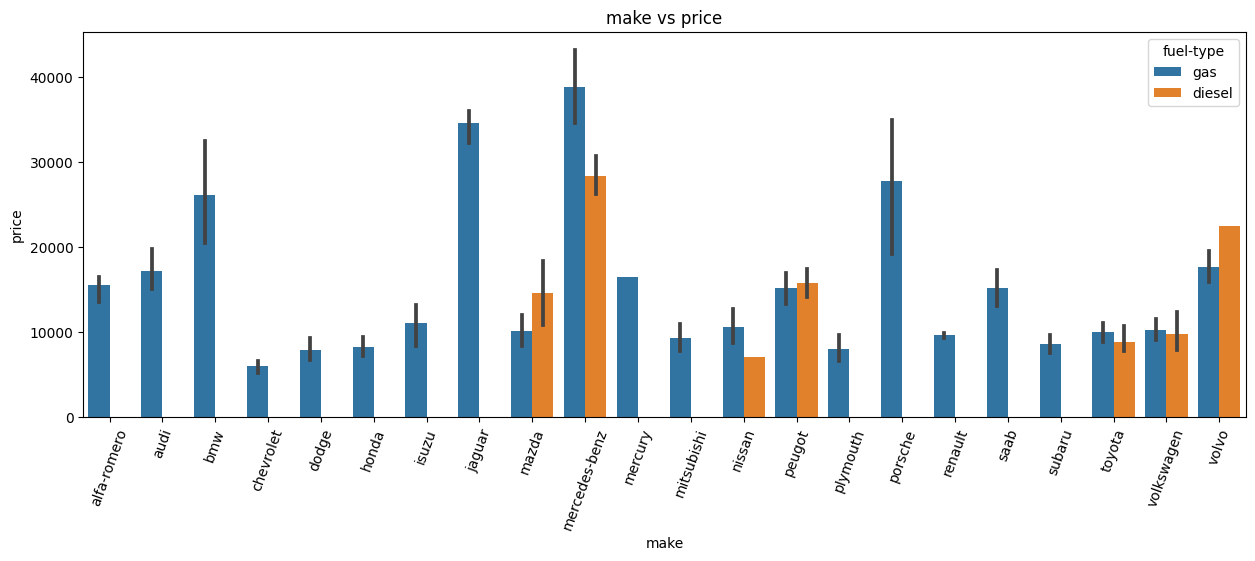

In [84]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='make',y='price',hue='fuel-type')
plt.title('make vs price')
plt.xticks(rotation=70)
plt.show()

* mercedes-benz has higher mean price gas as well as diesel
* chevrolet has only gas cars and has the lowest mean price
* among diesel cars nissan has the lowest mean price

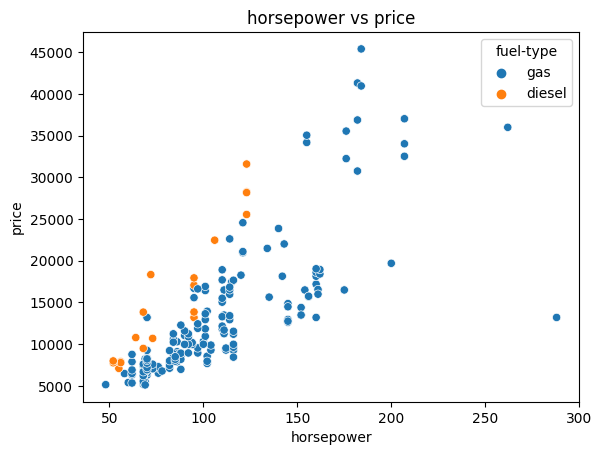

In [85]:
sns.scatterplot(data=df,x='horsepower',y='price',hue='fuel-type')
plt.title('horsepower vs price')
plt.show()

* as the horse power increases the price increases for both gas and diesel
* for the similar horse power diesel cars have higher prices

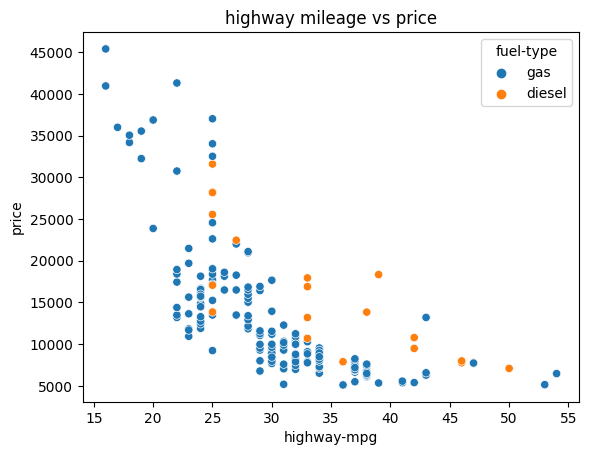

In [86]:
sns.scatterplot(data=df,x='highway-mpg',y='price',hue='fuel-type')
plt.title('highway mileage vs price')
plt.show()

*  as the highway mileage increases, the price of the vehicle tends to decrease for both gas and diesel types.
*  Diesel vehicles tend to have a higher price range than gas vehicles at similar mileage levels.

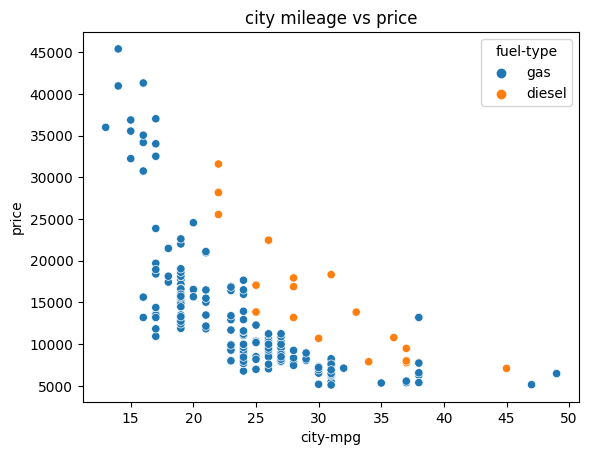

In [87]:
sns.scatterplot(data=df,x='city-mpg',y='price',hue='fuel-type')
plt.title('city mileage vs price')
plt.show()

*  as the city mileage increases, the price of the vehicle tends to decrease for both gas and diesel types.
*  Diesel vehicles tend to have a higher price range than gas vehicles at similar mileage levels.

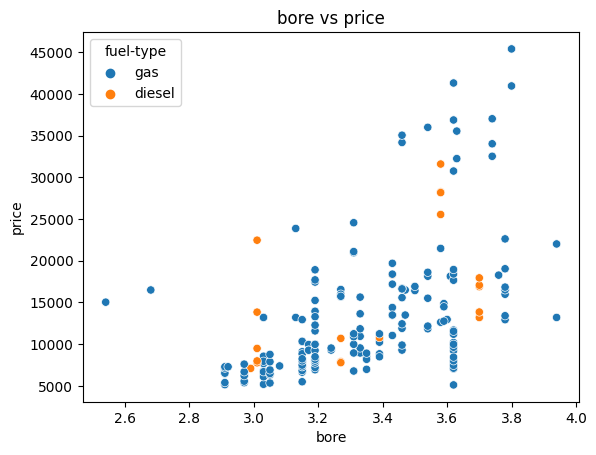

In [88]:
sns.scatterplot(data=df,x='bore',y='price',hue='fuel-type')
plt.title('bore vs price')
plt.show()

* when bore diameter increases the mean price also increases moderately for both fuel types

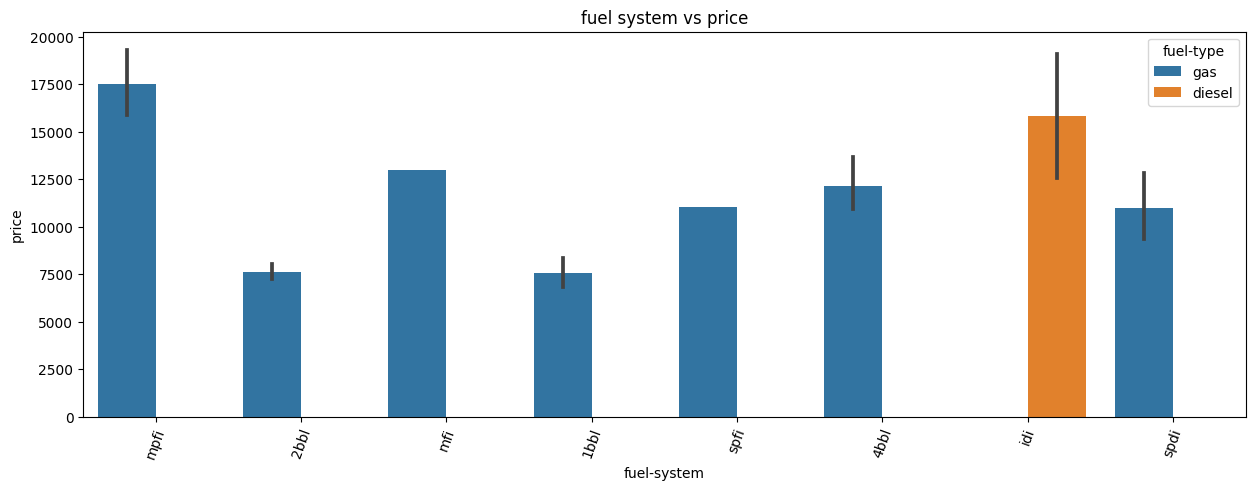

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='fuel-system',y='price',hue='fuel-type')
plt.title('fuel system vs price')
plt.xticks(rotation=70)
plt.show()

* only idi fuel system uses diesel
* idi and mpfi has highest mean price

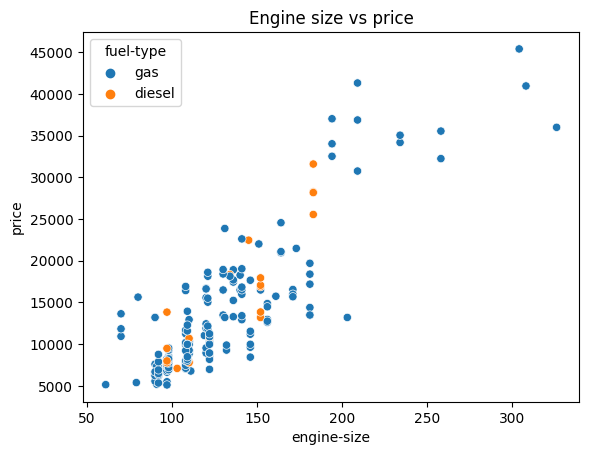

In [90]:
sns.scatterplot(data=df,x='engine-size',y='price',hue='fuel-type')
plt.title('Engine size vs price')
plt.show()

* as the engine size increases price also increases for both gas and diesel
  

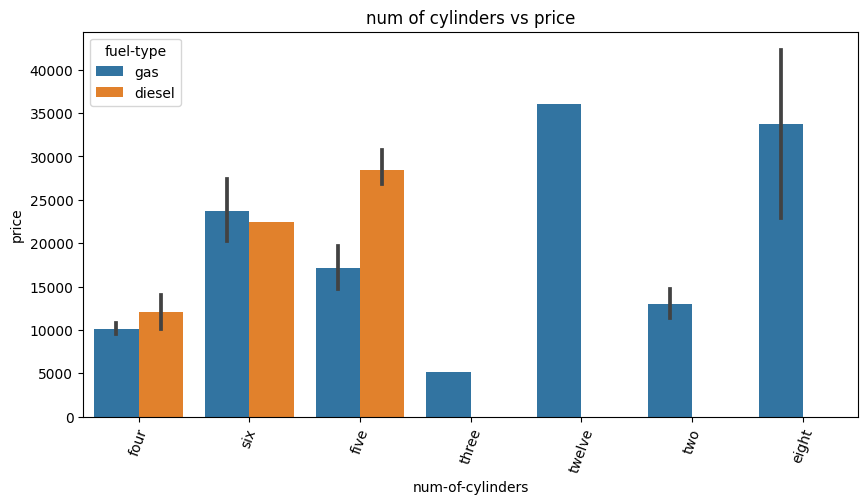

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='num-of-cylinders',y='price',hue='fuel-type')
plt.title('num of cylinders vs price')
plt.xticks(rotation=70)
plt.show()

* as num of cylinder increases price also increases
  

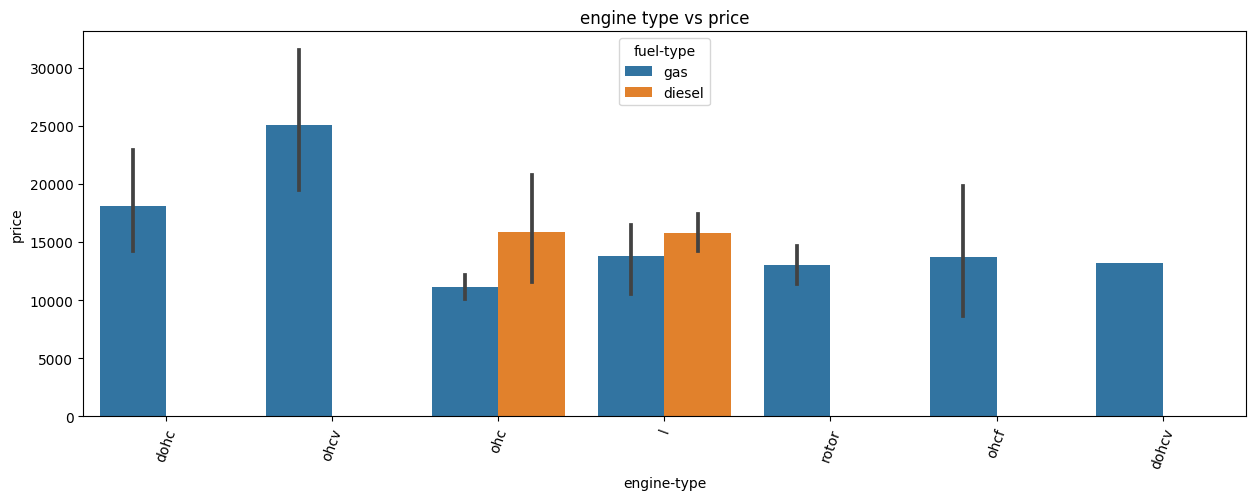

In [92]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='engine-type',y='price',hue='fuel-type')
plt.title('engine type vs price')
plt.xticks(rotation=70)
plt.show()

* only ohc and l have diesel fuels
* ohcv gas has highest mean price 

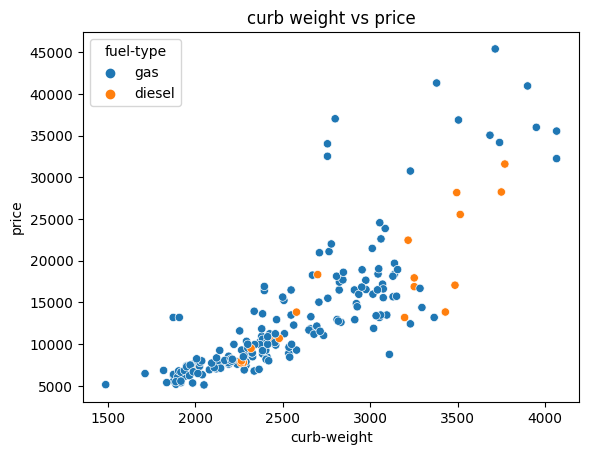

In [93]:
sns.scatterplot(data=df,x='curb-weight',y='price',hue='fuel-type')
plt.title('curb weight vs price')
plt.show()

* as curb weight increases price also increases
* diesel has more curb weight than most of gas cars

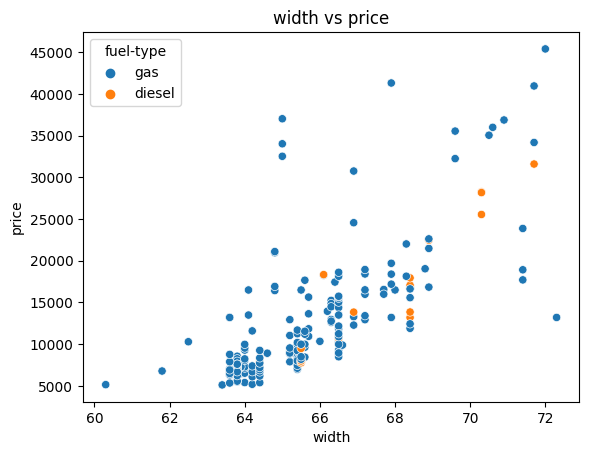

In [94]:
sns.scatterplot(data=df,x='width',y='price',hue='fuel-type')
plt.title('width vs price')
plt.show()

* price increases with increase in width for both gas and diesel
* width of diesel cars is more than majority of gas cars

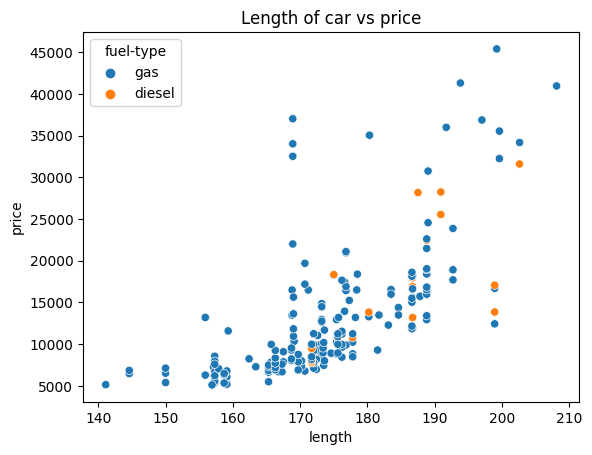

In [95]:
sns.scatterplot(data=df,x='length',y='price',hue='fuel-type')
plt.title('Length of car vs price')
plt.show()

* price increases with increase in length for both gas and diesel
* length of diesel cars is more than majority of gas cars

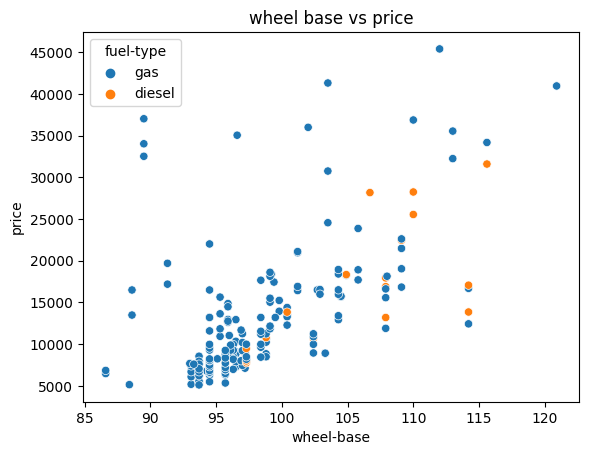

In [96]:
sns.scatterplot(data=df,x='wheel-base',y='price',hue='fuel-type')
plt.title('wheel base vs price')
plt.show()

* price increases with increase in wheel base for both gas and diesel* wheel baseh of diesel cars is more than majority of gas cars

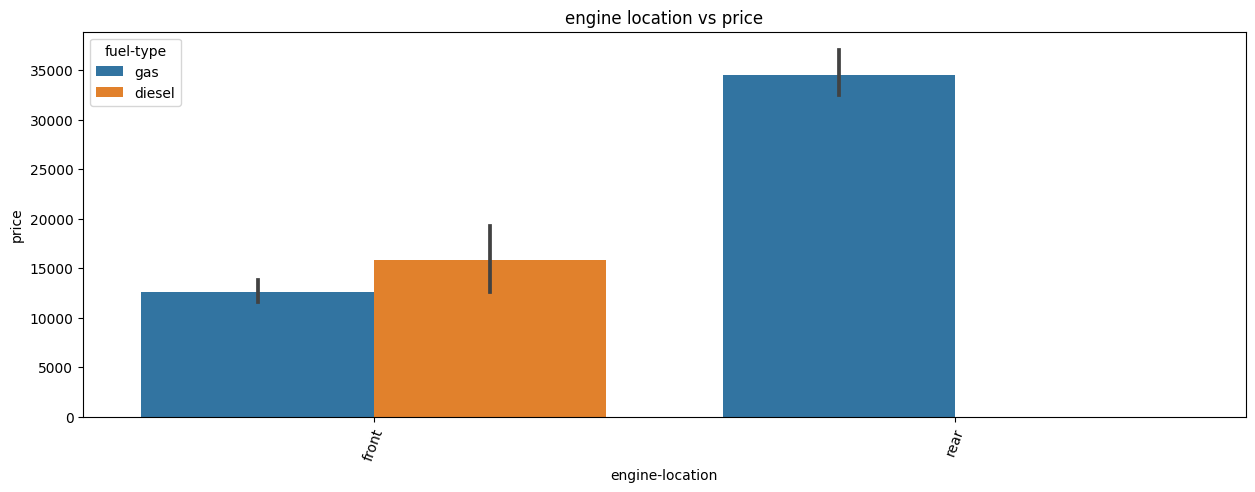

In [97]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='engine-location',y='price',hue='fuel-type')
plt.title('engine location vs price')
plt.xticks(rotation=70)
plt.show()

* mean price is more for engine at rear for gas cars
* for engine at front both gas and diesel cars have similar prices

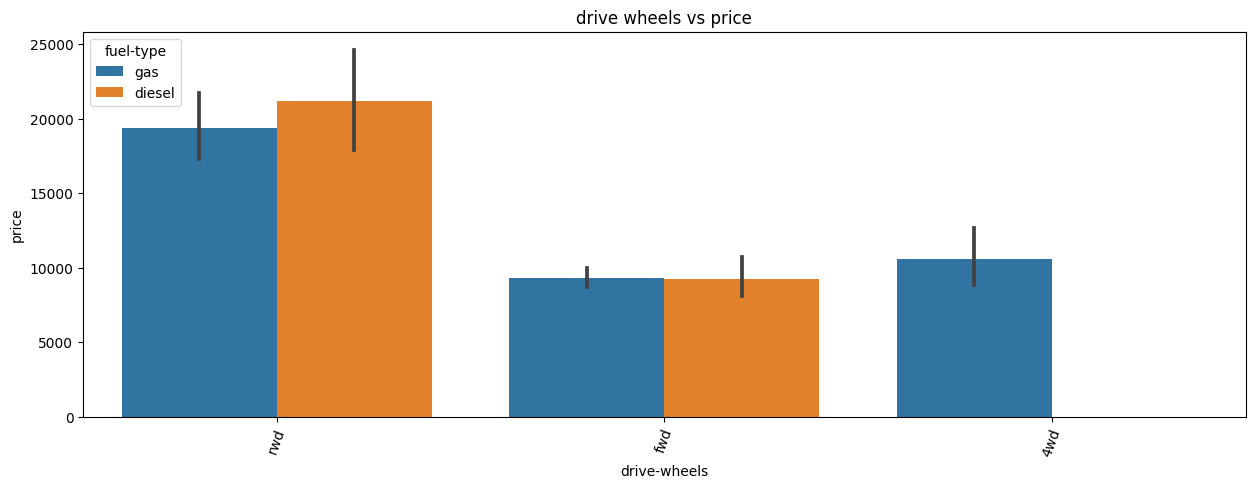

In [98]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='drive-wheels',y='price',hue='fuel-type')
plt.title('drive wheels vs price')
plt.xticks(rotation=70)
plt.show()

* rear wheel drive cars have higher mean price
* fwd has equal price for both gas and diesel
* 4 wheel drive does not have any diesel cars

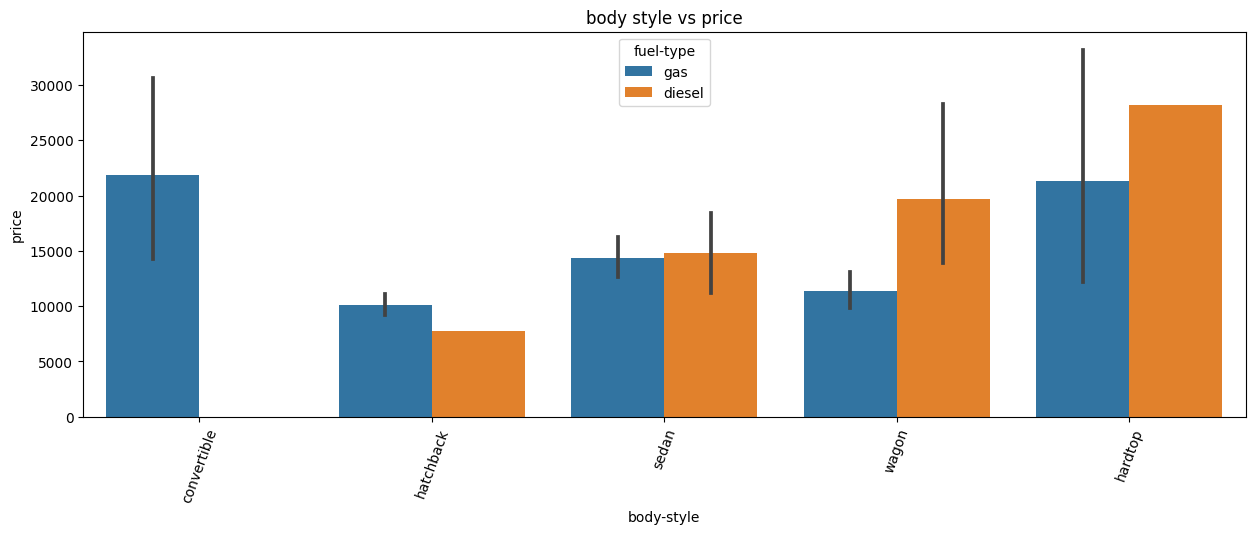

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='body-style',y='price',hue='fuel-type')
plt.title('body style vs price')
plt.xticks(rotation=70)
plt.show()

* hardtop has higher mean price in diesel
* convetible has higher mean price in gas
* hatchback has lowest price for both

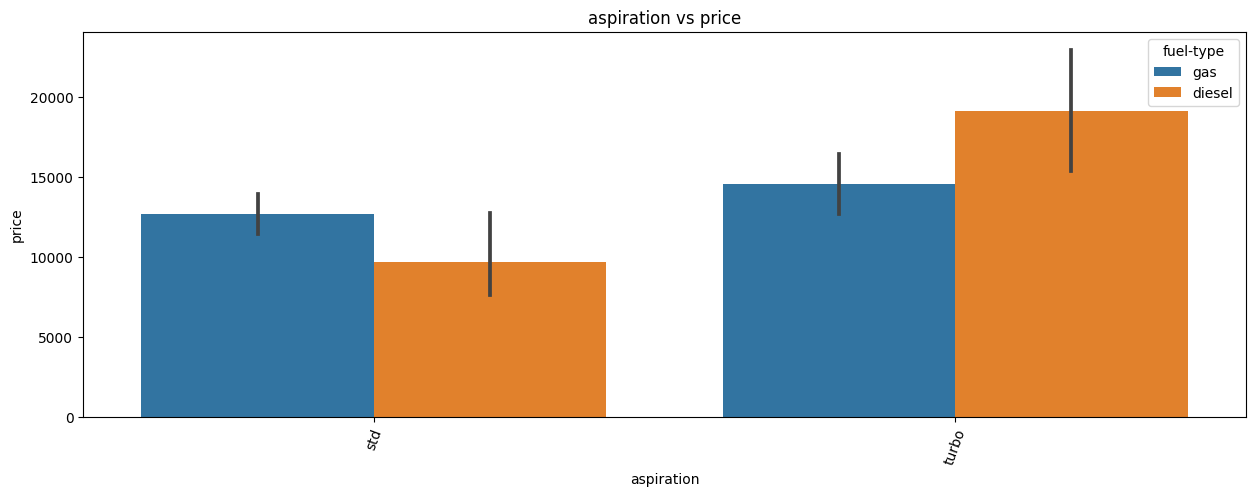

In [100]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='aspiration',y='price',hue='fuel-type')
plt.title('aspiration vs price')
plt.xticks(rotation=70)
plt.show()

* turbo has higher price for both gas and diesel

In [101]:
df

symboling  normalized-losses           make fuel-type aspiration  \
0            3                122    alfa-romero       gas        std   
1            3                122    alfa-romero       gas        std   
2            1                122    alfa-romero       gas        std   
3            2                164           audi       gas        std   
4            2                164           audi       gas        std   
5            2                122           audi       gas        std   
6            1                158           audi       gas        std   
7            1                122           audi       gas        std   
8            1                158           audi       gas      turbo   
9            0                122           audi       gas      turbo   
10           2                192            bmw       gas        std   
11           0                192            bmw       gas        std   
12           0                188            bmw       gas        std   
13           0                188            bmw       gas        std   
14           1                122            bmw       gas        std   
15           0                122            bmw       gas        std   
16           0                122            bmw       gas        std   
17           0                122            bmw       gas        std   
18           2                121      chevrolet       gas        std   
19           1                 98      chevrolet       gas        std   
20           0                 81      chevrolet       gas        std   
21           1                118          dodge       gas        std   
22           1                118          dodge       gas        std   
23           1                118          dodge       gas      turbo   
24           1                148          dodge       gas        std   
25           1                148          dodge       gas        std   
26           1                148          dodge       gas        std   
27           1                148          dodge       gas      turbo   
28          -1                110          dodge       gas        std   
29           3                145          dodge       gas      turbo   
30           2                137          honda       gas        std   
31           2                137          honda       gas        std   
32           1                101          honda       gas        std   
33           1                101          honda       gas        std   
34           1                101          honda       gas        std   
35           0                110          honda       gas        std   
36           0                 78          honda       gas        std   
37           0                106          honda       gas        std   
38           0                106          honda       gas        std   
39           0                 85          honda       gas        std   
40           0                 85          honda       gas        std   
41           0                 85          honda       gas        std   
42           1                107          honda       gas        std   
43           0                122          isuzu       gas        std   
44           1                122          isuzu       gas        std   
45           0                122          isuzu       gas        std   
46           2                122          isuzu       gas        std   
47           0                145         jaguar       gas        std   
48           0                122         jaguar       gas        std   
49           0                122         jaguar       gas        std   
50           1                104          mazda       gas        std   
51           1                104          mazda       gas        std   
52           1                104          mazda       gas        std   
53           1                113          mazda       gas     

### Feature Engineering 
* Data Encoding
* Checking for correlation
* Checking for Multicollinearity
* Selecting the relevant Features


In [102]:
# Data Encoding
#    * Label Encoding
#    * OneHot Encoding

In [103]:
from sklearn.preprocessing import LabelEncoder

colums_binary=[]
for i in df:
    if df[i].nunique()==2:
        colums_binary.append(i)
colums_binary

['fuel-type', 'aspiration', 'num-of-doors', 'engine-location']

In [104]:
lb=LabelEncoder()

In [105]:
for i in colums_binary:
    df[i] = lb.fit_transform(df[i])

In [106]:
df

symboling  normalized-losses           make  fuel-type  aspiration  \
0            3                122    alfa-romero          1           0   
1            3                122    alfa-romero          1           0   
2            1                122    alfa-romero          1           0   
3            2                164           audi          1           0   
4            2                164           audi          1           0   
5            2                122           audi          1           0   
6            1                158           audi          1           0   
7            1                122           audi          1           0   
8            1                158           audi          1           1   
9            0                122           audi          1           1   
10           2                192            bmw          1           0   
11           0                192            bmw          1           0   
12           0                188            bmw          1           0   
13           0                188            bmw          1           0   
14           1                122            bmw          1           0   
15           0                122            bmw          1           0   
16           0                122            bmw          1           0   
17           0                122            bmw          1           0   
18           2                121      chevrolet          1           0   
19           1                 98      chevrolet          1           0   
20           0                 81      chevrolet          1           0   
21           1                118          dodge          1           0   
22           1                118          dodge          1           0   
23           1                118          dodge          1           1   
24           1                148          dodge          1           0   
25           1                148          dodge          1           0   
26           1                148          dodge          1           0   
27           1                148          dodge          1           1   
28          -1                110          dodge          1           0   
29           3                145          dodge          1           1   
30           2                137          honda          1           0   
31           2                137          honda          1           0   
32           1                101          honda          1           0   
33           1                101          honda          1           0   
34           1                101          honda          1           0   
35           0                110          honda          1           0   
36           0                 78          honda          1           0   
37           0                106          honda          1           0   
38           0                106          honda          1           0   
39           0                 85          honda          1           0   
40           0                 85          honda          1           0   
41           0                 85          honda          1           0   
42           1                107          honda          1           0   
43           0                122          isuzu          1           0   
44           1                122          isuzu          1           0   
45           0                122          isuzu          1           0   
46           2                122          isuzu          1           0   
47           0                145         jaguar          1           0   
48           0                122         jaguar          1           0   
49           0                122         jaguar          1           0   
50           1                104          mazda          1           0   
51           1                104          mazda          1           0   
52           1                

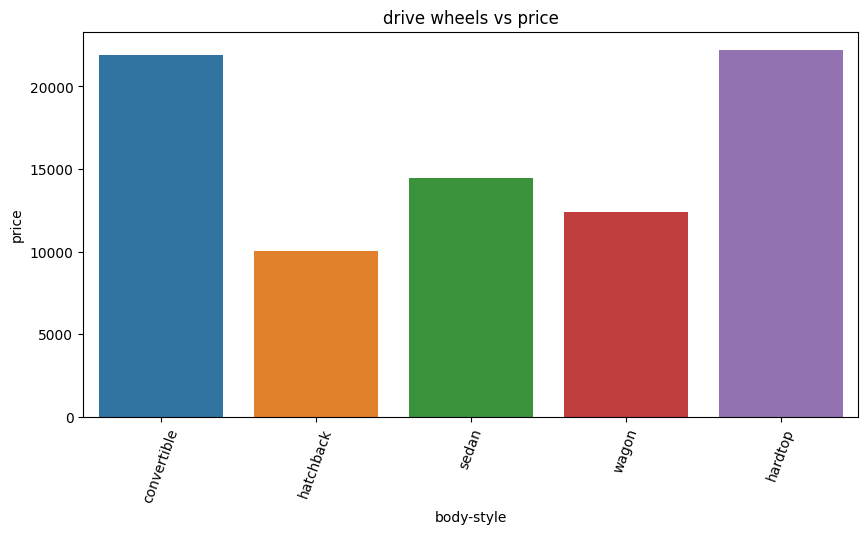

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='body-style',y='price',errorbar=None,)
plt.title('drive wheels vs price')
plt.xticks(rotation=70)
plt.show()

In [108]:
# Data Encoding the ordinal columns

# Encoding the column body-style
df['body-style'] = df['body-style'].replace(['hardtop','convertible'],3)
df['body-style'] = df['body-style'].replace(['sedan'],2)
df['body-style'] = df['body-style'].replace(['wagon'],1)
df['body-style'] = df['body-style'].replace(['hatchback'],0)

# Encoding the column drive-wheels
df['drive-wheels'] = df['drive-wheels'].replace(['rwd'],2)
df['drive-wheels'] = df['drive-wheels'].replace(['fwd'],1)
df['drive-wheels'] = df['drive-wheels'].replace(['4wd'],0)

# Encoding the column num-of-cylinders
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['two'],0)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['three'],1)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['four'],2)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['five'],3)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['six'],4)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['eight'],5)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['twelve'],6)

# Encoding the column engine-type
df['engine-type'] = df['engine-type'].replace(['ohc'],0)
df['engine-type'] = df['engine-type'].replace(['rotor','dohcv'],1)
df['engine-type'] = df['engine-type'].replace(['ohcf'],2)
df['engine-type'] = df['engine-type'].replace(['l'],3)
df['engine-type'] = df['engine-type'].replace(['dohc'],4)
df['engine-type'] = df['engine-type'].replace(['ohcv'],5)

# Encoding the column fuel-system
df['fuel-system'] = df['fuel-system'].replace(['2bbl','1bbl'],0)
df['fuel-system'] = df['fuel-system'].replace(['spfi','spdi'],1)
df['fuel-system'] = df['fuel-system'].replace(['4bbl'],2)
df['fuel-system'] = df['fuel-system'].replace(['mfi'],3)
df['fuel-system'] = df['fuel-system'].replace(['idi'],4)
df['fuel-system'] = df['fuel-system'].replace(['mpfi'],5)

# Encoding the column make
df['make'] = df['make'].replace(['jaguar','mercedes-benz'],4)
df['make'] = df['make'].replace(['porsche','bmw'],3)
df['make'] = df['make'].replace(['audi','alfa-romero','peugot','volvo','mercury','saab'],2)
df['make'] = df['make'].replace(['nissan','isuzu','toyota','volkswagen','renault','mazda'],1)
df['make'] = df['make'].replace(['subaru','mitsubishi','dodge','honda','plymouth','chevrolet'],0)

In [109]:
df

symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3                122     2          1           0             1   
1            3                122     2          1           0             1   
2            1                122     2          1           0             1   
3            2                164     2          1           0             0   
4            2                164     2          1           0             0   
5            2                122     2          1           0             1   
6            1                158     2          1           0             0   
7            1                122     2          1           0             0   
8            1                158     2          1           1             0   
9            0                122     2          1           1             1   
10           2                192     3          1           0             1   
11           0                192     3          1           0             0   
12           0                188     3          1           0             1   
13           0                188     3          1           0             0   
14           1                122     3          1           0             0   
15           0                122     3          1           0             0   
16           0                122     3          1           0             1   
17           0                122     3          1           0             0   
18           2                121     0          1           0             1   
19           1                 98     0          1           0             1   
20           0                 81     0          1           0             0   
21           1                118     0          1           0             1   
22           1                118     0          1           0             1   
23           1                118     0          1           1             1   
24           1                148     0          1           0             0   
25           1                148     0          1           0             0   
26           1                148     0          1           0             0   
27           1                148     0          1           1             0   
28          -1                110     0          1           0             0   
29           3                145     0          1           1             1   
30           2                137     0          1           0             1   
31           2                137     0          1           0             1   
32           1                101     0          1           0             1   
33           1                101     0          1           0             1   
34           1                101     0          1           0             1   
35           0                110     0          1           0             0   
36           0                 78     0          1           0             0   
37           0                106     0          1           0             1   
38           0                106     0          1           0             1   
39           0                 85     0          1           0             0   
40           0                 85     0          1           0             0   
41           0                 85     0          1           0             0   
42           1                107     0          1           0             1   
43           0                122     1          1           0             0   
44           1                122     1          1           0             1   
45           0                122     1          1           0             0   
46           2                122     1          1           0             1   
47           0                145     4          1           0             0   
48           0                122     4          1           0             0   
49   

In [110]:
df.shape

(205, 26)

## Outliers

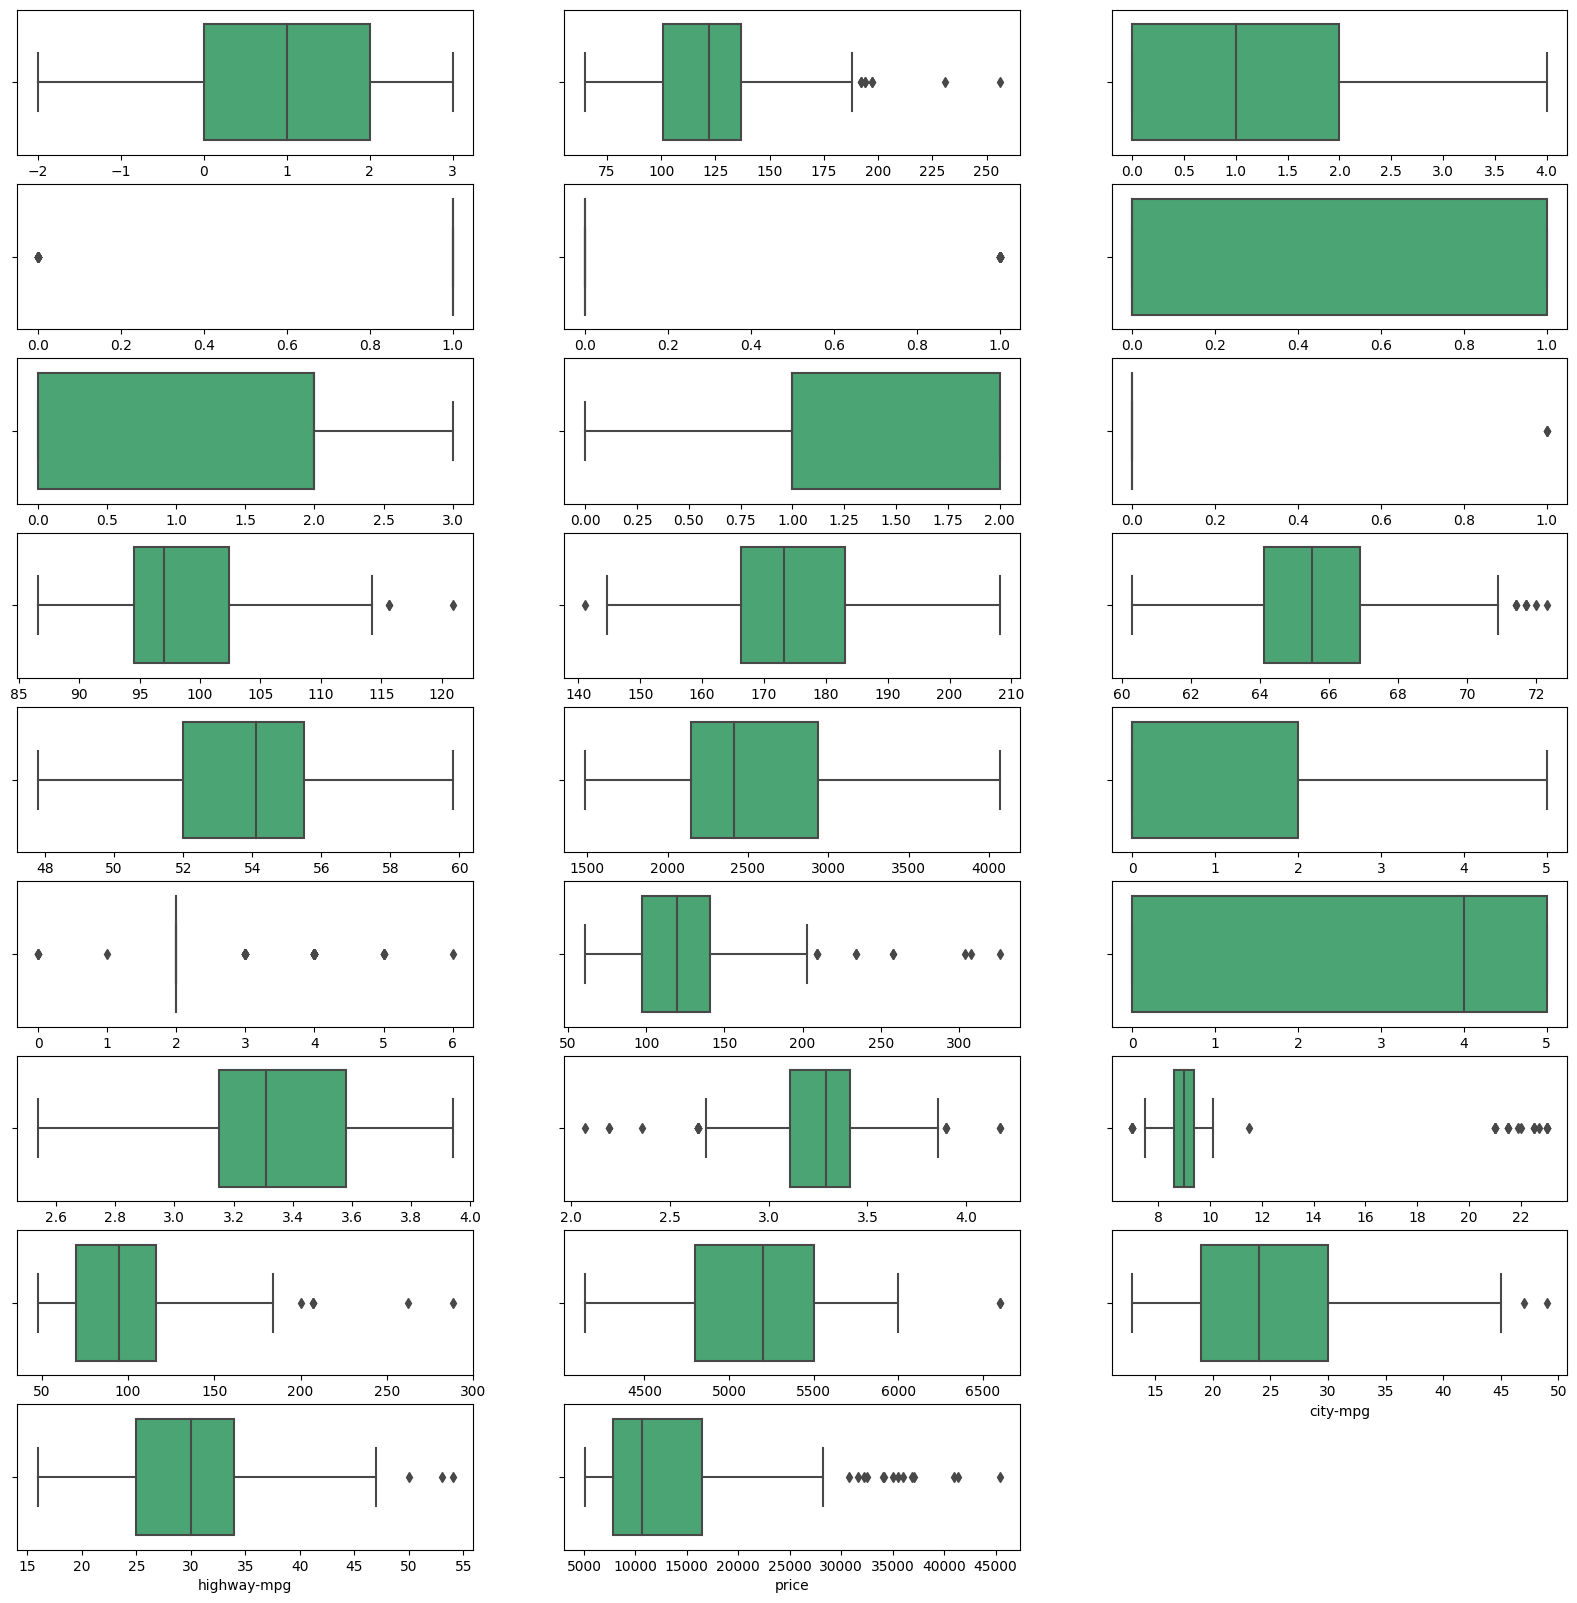

In [111]:
fig = plt.figure (figsize = [20,20])
# cat=['3D_available','Genre','Start_Tech_Oscar']
for i in enumerate (df):
   
        plt.subplot(9,3,i[0]+1)
        sns.boxplot(x = i[1],data = df , color='#3CB371')
   

In [112]:
# Handling Outliers using IQR Method
# for i in df:
#     Q1 = np.quantile(df[i],0.25)
#     Q3 = np.quantile(df[i],0.75)
#     IQR = Q3-Q1
    
#     Maximum = Q3+1.5*IQR
#     Minimum = Q1-1.5*IQR
    
#     for j in range(len(df[i])):
#         if df[i][j]>Maximum:
#             df[i][j]=Maximum
#         elif df[i][j]<Minimum:
#             df[i][j]=Minimum
#         else:
#             pass







# List of columns to skip
skip_columns = [
    'symboling', 'price', 'make', 'fuel-type', 'num-of-doors', 
    'body-style', 'drive-wheels', 'engine-location', 'engine-type', 
    'num-of-cylinders', 'fuel-system'
]

# Iterate over each column in the DataFrame
for column in df.columns:
    # Skip columns in the skip_columns list
    if column in skip_columns:
        continue
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the maximum and minimum thresholds for outliers
    Maximum = Q3 + 1.5 * IQR
    Minimum = Q1 - 1.5 * IQR
    
    # Use vectorized operations to replace outliers with the thresholds
    df[column] = np.where(df[column] > Maximum, Maximum, 
                          np.where(df[column] < Minimum, Minimum, df[column]))


        

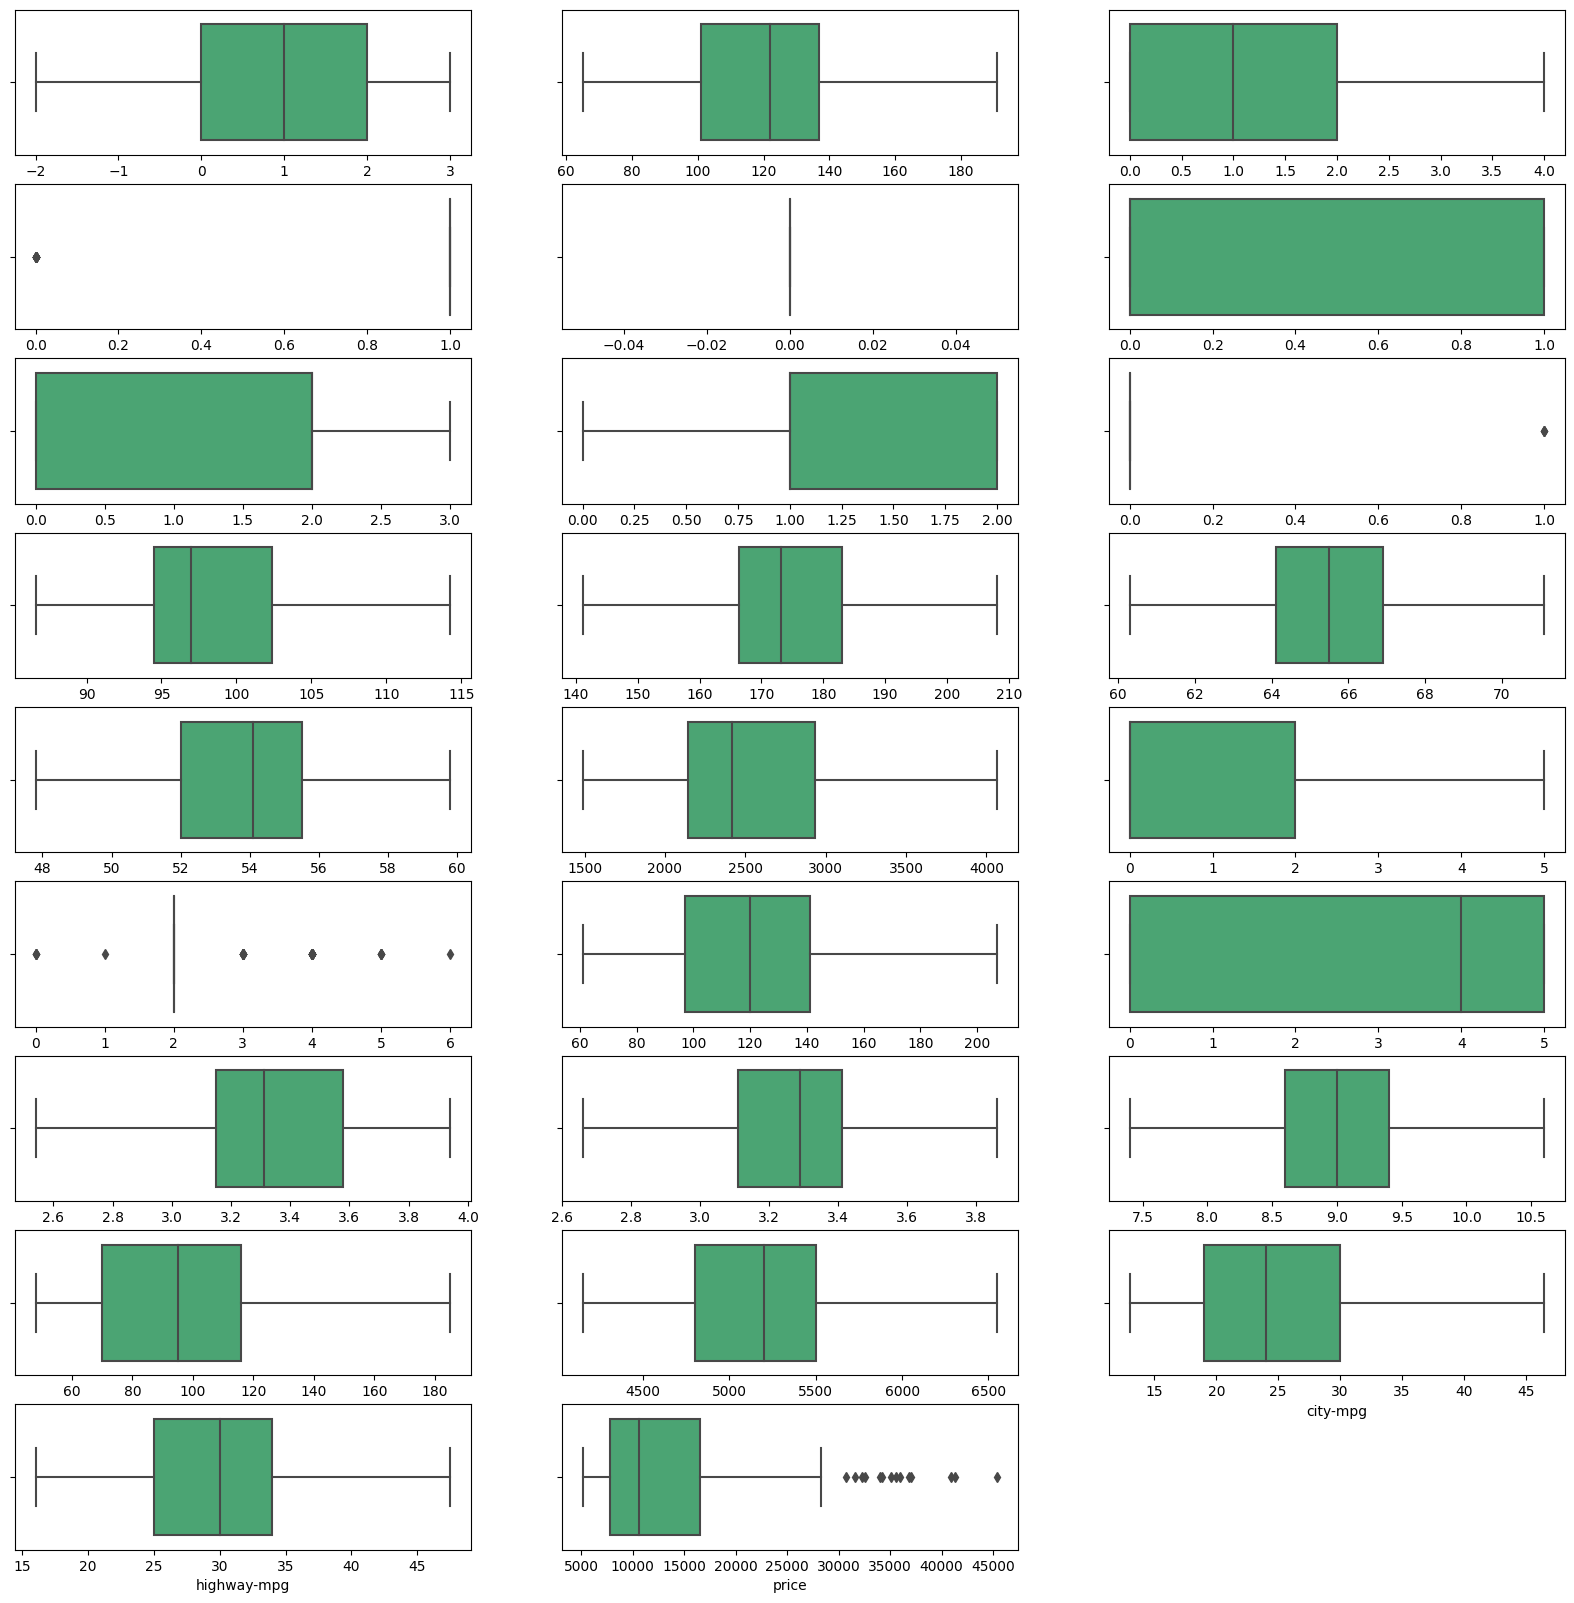

In [113]:
fig = plt.figure (figsize = [20,20])
# cat=['3D_available','Genre','Start_Tech_Oscar']
for i in enumerate (df):
   
        plt.subplot(9,3,i[0]+1)
        sns.boxplot(x = i[1],data = df , color='#3CB371')
   

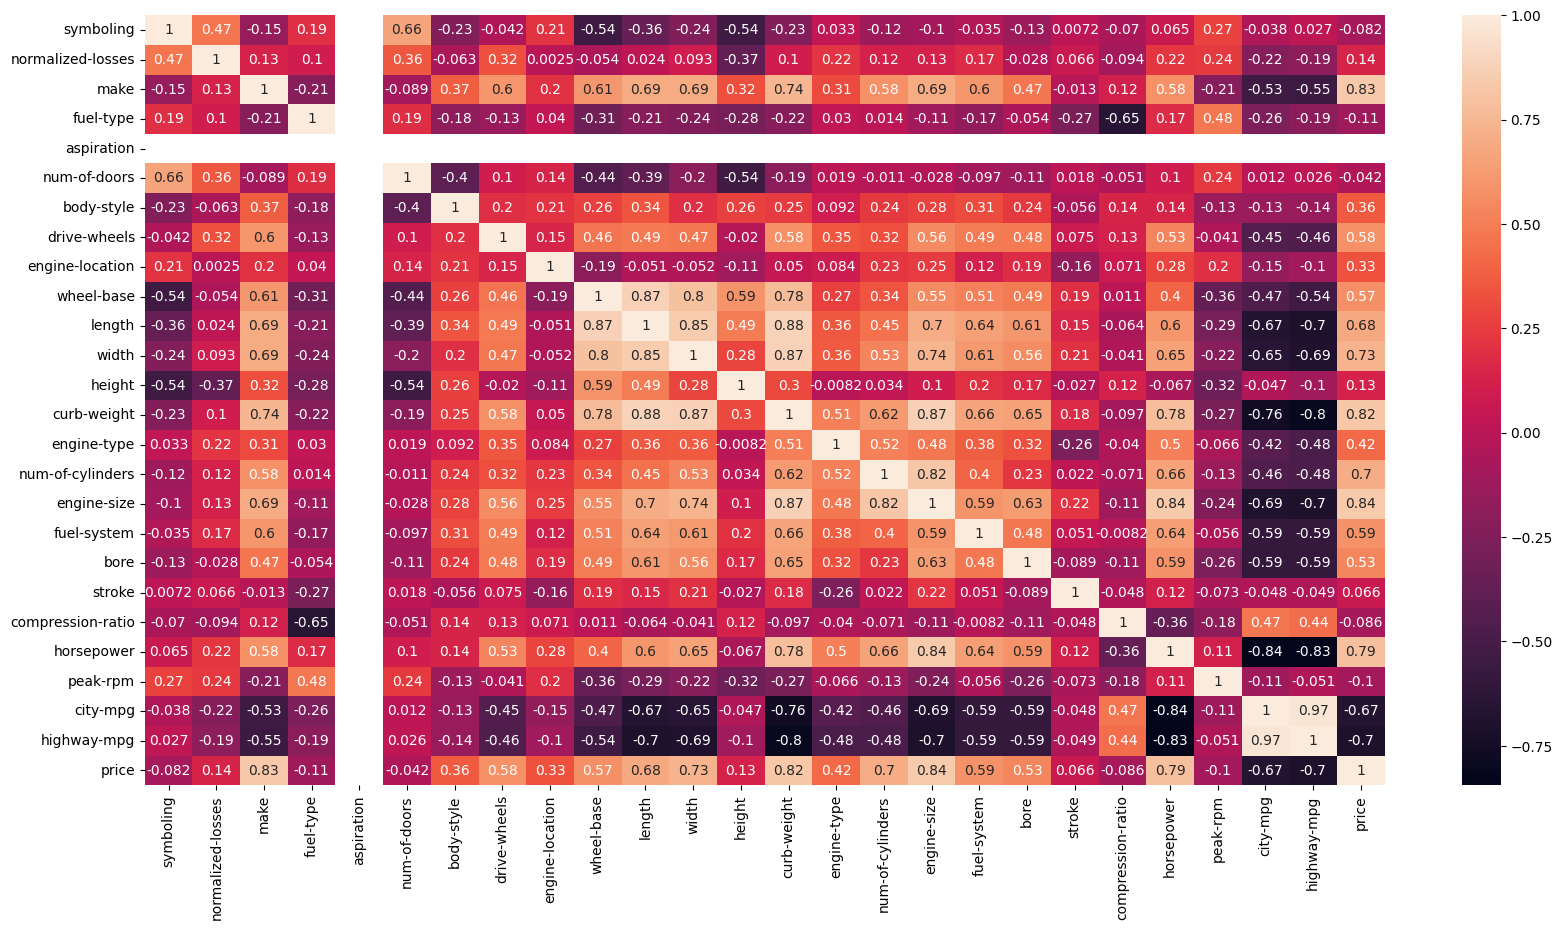

In [114]:
# Checking for Correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [115]:
high_corr_colms=[]
for i in df:
    corr = df['price'].corr(df[i])
    if corr > 0.5 or corr <-0.5:
        high_corr_colms.append(i)
high_corr_colms

['make',
 'drive-wheels',
 'wheel-base',
 'length',
 'width',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'price']

In [116]:
df = df[high_corr_colms]

In [117]:
df

make  drive-wheels  wheel-base  length  width  curb-weight  \
0       2             2       88.60   168.8   64.1       2548.0   
1       2             2       88.60   168.8   64.1       2548.0   
2       2             2       94.50   171.2   65.5       2823.0   
3       2             1       99.80   176.6   66.2       2337.0   
4       2             0       99.40   176.6   66.4       2824.0   
5       2             1       99.80   177.3   66.3       2507.0   
6       2             1      105.80   192.7   71.1       2844.0   
7       2             1      105.80   192.7   71.1       2954.0   
8       2             1      105.80   192.7   71.1       3086.0   
9       2             0       99.50   178.2   67.9       3053.0   
10      3             2      101.20   176.8   64.8       2395.0   
11      3             2      101.20   176.8   64.8       2395.0   
12      3             2      101.20   176.8   64.8       2710.0   
13      3             2      101.20   176.8   64.8       2765.0   
14      3             2      103.50   189.0   66.9       3055.0   
15      3             2      103.50   189.0   66.9       3230.0   
16      3             2      103.50   193.8   67.9       3380.0   
17      3             2      110.00   197.0   70.9       3505.0   
18      0             1       88.40   141.1   60.3       1488.0   
19      0             1       94.50   155.9   63.6       1874.0   
20      0             1       94.50   158.8   63.6       1909.0   
21      0             1       93.70   157.3   63.8       1876.0   
22      0             1       93.70   157.3   63.8       1876.0   
23      0             1       93.70   157.3   63.8       2128.0   
24      0             1       93.70   157.3   63.8       1967.0   
25      0             1       93.70   157.3   63.8       1989.0   
26      0             1       93.70   157.3   63.8       1989.0   
27      0             1       93.70   157.3   63.8       2191.0   
28      0             1      103.30   174.6   64.6       2535.0   
29      0             1       95.90   173.2   66.3       2811.0   
30      0             1       86.60   144.6   63.9       1713.0   
31      0             1       86.60   144.6   63.9       1819.0   
32      0             1       93.70   150.0   64.0       1837.0   
33      0             1       93.70   150.0   64.0       1940.0   
34      0             1       93.70   150.0   64.0       1956.0   
35      0             1       96.50   163.4   64.0       2010.0   
36      0             1       96.50   157.1   63.9       2024.0   
37      0             1       96.50   167.5   65.2       2236.0   
38      0             1       96.50   167.5   65.2       2289.0   
39      0             1       96.50   175.4   65.2       2304.0   
40      0             1       96.50   175.4   62.5       2372.0   
41      0             1       96.50   175.4   65.2       2465.0   
42      0             1       96.50   169.1   66.0       2293.0   
43      1             2       94.30   170.7   61.8       2337.0   
44      1             1       94.50   155.9   63.6       1874.0   
45      1             1       94.50   155.9   63.6       1909.0   
46      1             2       96.00   172.6   65.2       2734.0   
47      4             2      113.00   199.6   69.6       4066.0   
48      4             2      113.00   199.6   69.6       4066.0   
49      4             2      102.00   191.7   70.6       3950.0   
50      1             1       93.10   159.1   64.2       1890.0   
51      1             1       93.10   159.1   64.2       1900.0   
52      1             1       93.10   159.1   64.2       1905.0   
53      1             1       93.10   166.8   64.2       1945.0   
54      1             1       93.10   166.8   64.2       1950.0   
55      1             2       95.30   169.0   65.7       2380.0   
56      1             2       95.30   169.0   65.7       2380.0   
57      1             2       95.30   169.0   65.7       2385.0   
58      1             2       95.30   169.0   65.7  

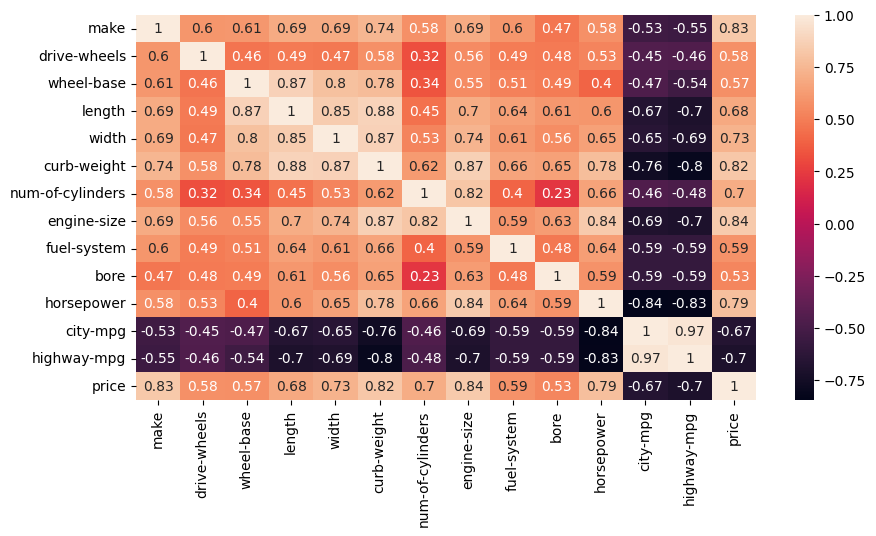

In [118]:
# Checking for Multicollinearity
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [119]:
multicol = {}
for i in df:
    col = []
    for j in df:
        corr = df[i].corr(df[j])
        if i!=j and corr > 0.5 and i!='price' and j!='price':
            col.append(j)
    multicol[i]=col

for i in multicol:
    print(f"{i} : {multicol[i]}")
            

make : ['drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders', 'engine-size', 'fuel-system', 'horsepower']
drive-wheels : ['make', 'curb-weight', 'engine-size', 'horsepower']
wheel-base : ['make', 'length', 'width', 'curb-weight', 'engine-size', 'fuel-system']
length : ['make', 'wheel-base', 'width', 'curb-weight', 'engine-size', 'fuel-system', 'bore', 'horsepower']
width : ['make', 'wheel-base', 'length', 'curb-weight', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'horsepower']
curb-weight : ['make', 'drive-wheels', 'wheel-base', 'length', 'width', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'horsepower']
num-of-cylinders : ['make', 'width', 'curb-weight', 'engine-size', 'horsepower']
engine-size : ['make', 'drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders', 'fuel-system', 'bore', 'horsepower']
fuel-system : ['make', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower']
bore 

In [120]:
selected_features=['make','curb-weight','engine-size','horsepower','price']
df = df[selected_features]
df

make  curb-weight  engine-size  horsepower     price
0       2       2548.0        130.0       111.0  13495.00
1       2       2548.0        130.0       111.0  16500.00
2       2       2823.0        152.0       154.0  16500.00
3       2       2337.0        109.0       102.0  13950.00
4       2       2824.0        136.0       115.0  17450.00
5       2       2507.0        136.0       110.0  15250.00
6       2       2844.0        136.0       110.0  17710.00
7       2       2954.0        136.0       110.0  18920.00
8       2       3086.0        131.0       140.0  23875.00
9       2       3053.0        131.0       160.0  13207.13
10      3       2395.0        108.0       101.0  16430.00
11      3       2395.0        108.0       101.0  16925.00
12      3       2710.0        164.0       121.0  20970.00
13      3       2765.0        164.0       121.0  21105.00
14      3       3055.0        164.0       121.0  24565.00
15      3       3230.0        207.0       182.0  30760.00
16      3       3380.0        207.0       182.0  41315.00
17      3       3505.0        207.0       182.0  36880.00
18      0       1488.0         61.0        48.0   5151.00
19      0       1874.0         90.0        70.0   6295.00
20      0       1909.0         90.0        70.0   6575.00
21      0       1876.0         90.0        68.0   5572.00
22      0       1876.0         90.0        68.0   6377.00
23      0       2128.0         98.0       102.0   7957.00
24      0       1967.0         90.0        68.0   6229.00
25      0       1989.0         90.0        68.0   6692.00
26      0       1989.0         90.0        68.0   7609.00
27      0       2191.0         98.0       102.0   8558.00
28      0       2535.0        122.0        88.0   8921.00
29      0       2811.0        156.0       145.0  12964.00
30      0       1713.0         92.0        58.0   6479.00
31      0       1819.0         92.0        76.0   6855.00
32      0       1837.0         79.0        60.0   5399.00
33      0       1940.0         92.0        76.0   6529.00
34      0       1956.0         92.0        76.0   7129.00
35      0       2010.0         92.0        76.0   7295.00
36      0       2024.0         92.0        76.0   7295.00
37      0       2236.0        110.0        86.0   7895.00
38      0       2289.0        110.0        86.0   9095.00
39      0       2304.0        110.0        86.0   8845.00
40      0       2372.0        110.0        86.0  10295.00
41      0       2465.0        110.0       101.0  12945.00
42      0       2293.0        110.0       100.0  10345.00
43      1       2337.0        111.0        78.0   6785.00
44      1       1874.0         90.0        70.0  13207.13
45      1       1909.0         90.0        70.0  13207.13
46      1       2734.0        119.0        90.0  11048.00
47      4       4066.0        207.0       176.0  32250.00
48      4       4066.0        207.0       176.0  35550.00
49      4       3950.0        207.0       185.0  36000.00
50      1       1890.0         91.0        68.0   5195.00
51      1       1900.0         91.0        68.0   6095.00
52      1       1905.0         91.0        68.0   6795.00
53      1       1945.0         91.0        68.0   6695.00
54      1       1950.0         91.0        68.0   7395.00
55      1       2380.0         70.0       101.0  10945.00
56      1       2380.0         70.0       101.0  11845.00
57      1       2385.0         70.0       101.0  13645.00
58      1       2500.0         80.0       135.0  15645.00
59      1       2385.0        122.0        84.0   8845.00
60      1       2410.0        122.0        84.0   8495.00
61      1       2385.0        122.0        84.0  10595.00
62      1       2410.0        122.0        84.0  10245.00
63      1       2443.0        122.0        64.0  10795.00
64      1       2425.0        122.0        84.0  11245.00
65      1       2670.0        140.0       120.0  18280.00
66      1       2700.0        134.0        72.0  18344.00
67      4       3515.0        183.0       123.0  25552.00
68 

 # Model Building

In [121]:
x = df.drop('price',axis=1)
y = df['price']

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
import pandas as pd

# Split the data
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identify columns to normalize and columns to exclude from normalization
columns_to_normalize = x_train.columns[x_train.columns != 'make']
columns_to_exclude = ['make']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the columns to normalize
x_train_normalized = x_train.copy()
x_test_normalized = x_test.copy()

# Apply normalization to the relevant columns
x_train_normalized[columns_to_normalize] = scaler.fit_transform(x_train[columns_to_normalize])
x_test_normalized[columns_to_normalize] = scaler.transform(x_test[columns_to_normalize])

# Save the scaler
# joblib.dump(scaler, 'scaler_file.sav')

# Update x_train and x_test with normalized data
x_train = x_train_normalized
x_test = x_test_normalized


## KNN

### KFOLD (KNN)

In [134]:
# pip install scikit-learn==1.5.1


In [135]:
from sklearn.model_selection import KFold

In [136]:
kfold = KFold(n_splits=5)
kfold.split(df)

<generator object _BaseKFold.split at 0x000001B2FC8DD000>

In [137]:
from statistics import mean
n=0
scores=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    knn = KNeighborsRegressor(n_neighbors=7)
    knn.fit(x_trainkfold,y_trainkfold)
    score = knn.score(x_testkfold,y_testkfold)
    scores.append(score)
    print(f"Fold {n} (KNN) : {score}")
print(scores)
kfold_crossvalidation_score=mean(scores)
kfold_crossvalidation_score
    
    
    

Fold 1 (KNN) : 0.8378511447799091
Fold 2 (KNN) : 0.84999406937399
Fold 3 (KNN) : 0.7917632335810348
Fold 4 (KNN) : 0.8819280528134673
Fold 5 (KNN) : 0.8205860229083268
[0.8378511447799091, 0.84999406937399, 0.7917632335810348, 0.8819280528134673, 0.8205860229083268]


0.8364245046913457

In [138]:
knn.score(x_test,y_test)

0.8724010499176179

In [139]:
knn.score(x_train,y_train)

0.8789309060355947

In [140]:
new_data_point = np.array([[2, -0.014566, 0.160196, 0.226098]])

In [141]:
knn.predict(new_data_point)

array([13902.14285714])

In [142]:
y_pred = knn.predict(x_test)

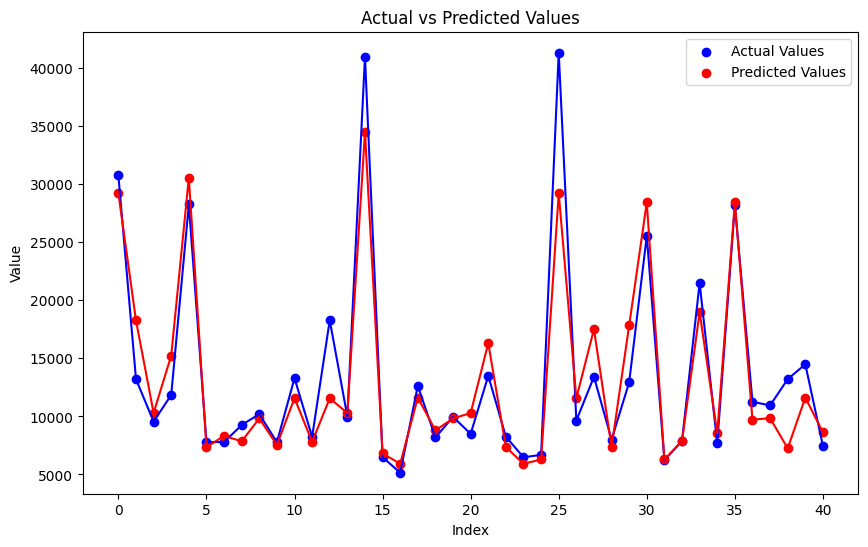

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_test)), y_pred, color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [144]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrameresults
results

Actual     Predicted
15   30760.00  29222.428571
9    13207.13  18262.571429
100   9549.00  10301.285714
132  11850.00  15232.142857
68   28248.00  30551.571429
95    7799.00   7355.285714
159   7788.00   8322.571429
162   9258.00   7856.571429
147  10198.00   9824.428571
182   7775.00   7544.428571
191  13295.00  11579.571429
164   8238.00   7802.142857
65   18280.00  11558.142857
175   9988.00  10289.142857
73   40960.00  34477.428571
152   6488.00   6811.428571
18    5151.00   5921.428571
82   12629.00  11620.428571
86    8189.00   8795.000000
143   9960.00   9824.428571
60    8495.00  10289.142857
101  13499.00  16302.000000
98    8249.00   7355.285714
30    6479.00   5921.428571
25    6692.00   6290.571429
16   41315.00  29222.428571
168   9639.00  11558.142857
195  13415.00  17511.428571
97    7999.00   7355.285714
194  12940.00  17841.428571
67   25552.00  28428.428571
120   6229.00   6290.571429
154   7898.00   7873.000000
202  21485.00  18981.428571
79    7689.00   8554.714286
69   28176.00  28428.428571
145  11259.00   9716.571429
55   10945.00   9849.428571
45   13207.13   7247.875714
84   14489.00  11620.428571
146   7463.00   8626.000000

### Model EVALUATION (KNN)

In [146]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [147]:
y_pred=knn.predict(x_test)

In [148]:
MAE_KNN = mean_absolute_error(y_test,y_pred)

In [149]:
MSE_KNN = mean_squared_error(y_test,y_pred)

In [150]:
MAE_KNN

2044.6929268292683

In [151]:
MSE_KNN

9949154.990690142

## Linear Regression

### KFOLD (LG)

In [152]:
from statistics import mean
n=0
scores=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    lg = LinearRegression()
    lg.fit(x_trainkfold,y_trainkfold)
    score = lg.score(x_testkfold,y_testkfold)
    scores.append(score)
    print(f"Fold {n} (LG) : {score}")
print(scores)
kfold_crossvalidation_score=mean(scores)
kfold_crossvalidation_score
    
    
    

Fold 1 (LG) : 0.8027467638297312
Fold 2 (LG) : 0.8588147770141934
Fold 3 (LG) : 0.8613086427148609
Fold 4 (LG) : 0.8808099308445965
Fold 5 (LG) : 0.7442302253948837
[0.8027467638297312, 0.8588147770141934, 0.8613086427148609, 0.8808099308445965, 0.7442302253948837]


0.8295820679596532

In [153]:
lg.score(x_test,y_test)

0.8487801130408579

In [154]:
lg.score(x_train,y_train)

0.8394400254108

### Model EVALUATION (LG)

In [155]:
y_pred=lg.predict(x_test)

In [156]:
MAE_LG = mean_absolute_error(y_test,y_pred)
MAE_LG

2400.5481180213987

In [157]:
MSE_LG = mean_squared_error(y_test,y_pred)
MSE_LG

11790928.468140116

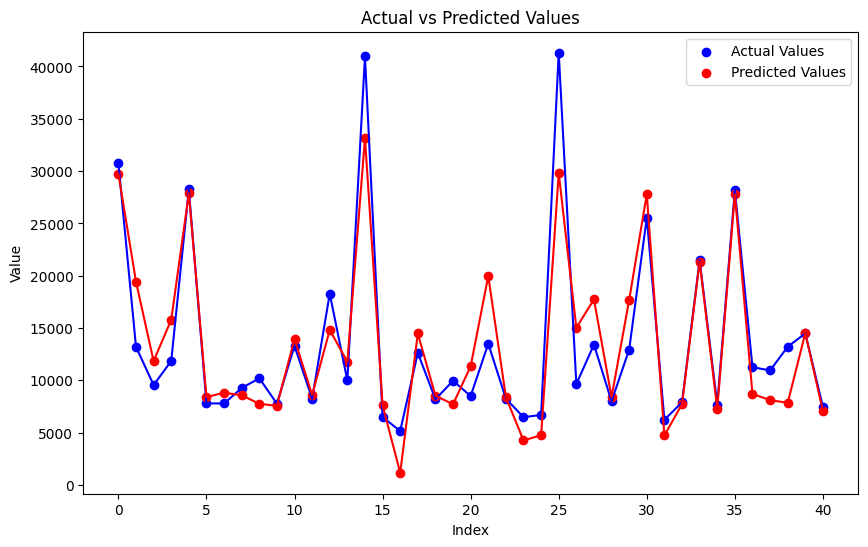

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_test)), y_pred, color='red')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
MSE_RF = mean_squared_error(y_test,y_pred)

# AdaBoostRegressor

## KFOLD (AdaBoostRegressor)

In [ ]:
from statistics import mean
n=0
scores=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    ab = AdaBoostRegressor()
    ab.fit(x_trainkfold,y_trainkfold)
    score = ab.score(x_testkfold,y_testkfold)
    scores.append(score)
    print(f"Fold {n} (ab) : {score}")
print(scores)
kfold_crossvalidation_score=mean(scores)
kfold_crossvalidation_score
    
    
    

In [ ]:
ab.score(x_test,y_test)

In [ ]:
ab.score(x_train,y_train)

### MODEL EVALUATION (AdaBoostRegressor)

In [ ]:
y_pred = ab.predict(x_test)

In [ ]:
MAE_AdaBoostRegressor = mean_absolute_error(y_test,y_pred)

In [ ]:
MSE_AdaBoostRegressor = mean_squared_error(y_test,y_pred)

# CatBoostRegressor

## KFOLD (CatBoostRegressor)

In [ ]:
from statistics import mean
n=0
scores=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    ct = CatBoostRegressor()
    ct.fit(x_trainkfold,y_trainkfold)
    score = ct.score(x_testkfold,y_testkfold)
    scores.append(score)
    print(f"Fold {n} (ct) : {score}")
print(scores)
kfold_crossvalidation_score=mean(scores)
kfold_crossvalidation_score
    
    
    

In [ ]:
ct.score(x_test,y_test)

In [ ]:
ct.score(x_train,y_train)

### MODEL EVALUATION (CatBoostRegressor)

In [ ]:
y_pred = ct.predict(x_test)

In [ ]:
MAE_CatBoostRegressor = mean_absolute_error(y_test,y_pred)
MAE_CatBoostRegressor

In [ ]:
MSE_CatBoostRegressor = mean_squared_error(y_test,y_pred)
MSE_CatBoostRegressor

# ExtraTreesRegressor

## KFOLD (ExtraTreesRegressor)

In [ ]:
from statistics import mean
n=0
scores=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    et = ExtraTreesRegressor()
    et.fit(x_trainkfold,y_trainkfold)
    score = et.score(x_testkfold,y_testkfold)
    scores.append(score)
    print(f"Fold {n} (et) : {score}")
print(scores)
kfold_crossvalidation_score=mean(scores)
kfold_crossvalidation_score
    
    
    

In [ ]:
et.score(x_test,y_test)

In [ ]:
et.score(x_train,y_train)

### MODEL EVALUATION (ExtraTreesRegressor)

In [ ]:
y_pred = et.predict(x_test)

In [ ]:
MAE_ExtraTreesRegressor = mean_absolute_error(y_test,y_pred)
MAE_ExtraTreesRegressor

In [ ]:
MSE_ExtraTreesRegressor = mean_squared_error(y_test,y_pred)
MSE_ExtraTreesRegressor

In [ ]:

scores = {
    'Linear Regression': lg.score(x_test, y_test),
    'Decision Tree': dt.score(x_test, y_test),
    'KNN': knn.score(x_test, y_test),
    'ADABOOST':ab.score(x_test,y_test),
    'RANDOM FOREST':rf.score(x_test,y_test),
    
    'CatBoostRegressor':ct.score(x_test,y_test),
    'ExtraTreeRegressor':et.score(x_test,y_test)
    
}

res = pd.DataFrame(scores, index=['test accuracy'])

max_score_model = max(scores, key=scores.get)
max_score_value = scores[max_score_model]


print(f"The model with the highest test accuracy is {max_score_model} = {max_score_value:.4f}.")


In [ ]:
res